In [1]:
import pandas as pd
import numpy as np
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn


from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer




In [2]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

### Data manipulation and cleanup

In [3]:
df = pd.read_csv('survey data.csv')

df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 166 columns):
 #    Column                              Dtype  
---   ------                              -----  
 0    variant                             object 
 1    group                               object 
 2    age                                 int64  
 3    gender_1F_2M_3O                     int64  
 4    education_level                     int64  
 5    education_level_otherSpecification  object 
 6    income_level                        int64  
 7    Country_birth                       object 
 8    English_proficiency                 int64  
 9    religion                            int64  
 10   religion_other_spec                 object 
 11   meditation_freq                     int64  
 12   meditation_howlong                  int64  
 13   medit_type_silent                   int64  
 14   medit_type_voice                    int64  
 15   medit_type_breath                   in

In [4]:
# Only keeping the columns that we need

columns_to_keep = ['group', 'age', 'gender_1F_2M_3O', 'income_level', 'education_level', 'classicalPsych_frequency', 'TimeSinceLastClassicalPsych', 'meditation_freq', 'meditation_howlong', 
                'exp_LSD', 'exp_psilocybin', 'exp_ayahuasca', 'exp_DMT', 'exp_5meoDMT', 'exp_mescaline', 'exp_ibogaine', 'exp_salvia', 'exp_mdma', 'exp_ketamine', 'exp_cannabis', 'other_drug_dummy', 'exp_other_drug', 'how_many_drugs',
                'exp_medit_silent', 'exp_medit_voice', 'exp_medit_breath', 'exp_medit_body', 'exp_medit_mindfulness', 'exp_other_medit', 'exp_where', 'exp_who', 'exp_guide', 'MEQ30_sum', 'Open_report typo-corrected',
                'MEQ30_Q1_mystical', 'MEQ30_Q2_mystical', 'MEQ30_Q3_mystical', 'MEQ30_Q4_mystical', 'MEQ30_Q5_mystical', 'MEQ30_Q6_mystical', 'MEQ30_Q7_mystical', 'MEQ30_Q8_mystical', 'MEQ30_Q9_mystical', 'MEQ30_Q10_mystical',
                'MEQ30_Q11_mystical', 'MEQ30_Q12_mystical', 'MEQ30_Q13_mystical', 'MEQ30_Q14_mystical', 'MEQ30_Q15_mystical', 'MEQ30_Q16_positive_mood', 'MEQ30_Q17_positive_mood', 'MEQ30_Q18_positive_mood', 'MEQ30_Q19_positive_mood',
                'MEQ30_Q20_positive_mood', 'MEQ30_Q21_positive_mood', 'MEQ30_Q22_transcendence', 'MEQ30_Q23_transcendence', 'MEQ30_Q24_transcendence', 'MEQ30_Q25_transcendence', 'MEQ30_Q26_transcendence', 'MEQ30_Q27_transcendence',
                'MEQ30_Q28_ineffability', 'MEQ30_Q29_ineffability', 'MEQ30_Q30_ineffability']

df = df[columns_to_keep] 

df.head(10)

,group,age,gender_1F_2M_3O,income_level,education_level,classicalPsych_frequency,TimeSinceLastClassicalPsych,meditation_freq,meditation_howlong,exp_LSD,exp_psilocybin,exp_ayahuasca,exp_DMT,exp_5meoDMT,exp_mescaline,exp_ibogaine,exp_salvia,exp_mdma,exp_ketamine,exp_cannabis,other_drug_dummy,exp_other_drug,how_many_drugs,exp_medit_silent,exp_medit_voice,exp_medit_breath,exp_medit_body,exp_medit_mindfulness,exp_other_medit,exp_where,exp_who,exp_guide,MEQ30_sum,Open_report typo-corrected,MEQ30_Q1_mystical,MEQ30_Q2_mystical,MEQ30_Q3_mystical,MEQ30_Q4_mystical,MEQ30_Q5_mystical,MEQ30_Q6_mystical,MEQ30_Q7_mystical,MEQ30_Q8_mystical,MEQ30_Q9_mystical,MEQ30_Q10_mystical,MEQ30_Q11_mystical,MEQ30_Q12_mystical,MEQ30_Q13_mystical,MEQ30_Q14_mystical,MEQ30_Q15_mystical,MEQ30_Q16_positive_mood,MEQ30_Q17_positive_mood,MEQ30_Q18_positive_mood,MEQ30_Q19_positive_mood,MEQ30_Q20_positive_mood,MEQ30_Q21_positive_mood,MEQ30_Q22_transcendence,MEQ30_Q23_transcendence,MEQ30_Q24_transcendence,MEQ30_Q25_transcendence,MEQ30_Q26_transcendence,MEQ30_Q27_transcendence,MEQ30_Q28_ineffability,MEQ30_Q29_ineffability,MEQ30_Q30_ineffability
0,meditation,64,2,2,4,3,0,6,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,single,0.0,0.0,0.0,0.0,1.0,NaN,0,0,0,47.0,There is a fundamental concept in Buddhism cal...,3.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
1,meditation,31,2,4,7,0,0,4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,single,0.0,0.0,0.0,0.0,0.0,NaN,5,3,1,45.0,I developed all positive feelings. All thought...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,4.0,5.0,5.0,4.0,5.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0
2,meditation,45,1,2,7,0,0,5,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,single,1.0,0.0,0.0,0.0,0.0,NaN,0,0,1,147.0,I had recently lost my father unexpectedly. A ...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
3,meditation,33,2,3,6,5,0,6,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,single,1.0,0.0,0.0,0.0,0.0,NaN,5,3,1,74.0,There was an objective experience of the self ...,5.0,5.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,5.0,5.0,0.0,5.0,5.0,0.0,0.0,5.0,0.0,5.0,0.0,5.0,0.0,2.0,5.0,0.0,5.0,0.0,5.0,5.0
4,meditation,56,2,4,6,5,0,6,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,single,1.0,0.0,0.0,0.0,1.0,NaN,5,0,0,109.0,Deep abiding peace with understanding of the i...,4.0,4.0,4.0,5.0,3.0,2.0,0.0,4.0,3.0,5.0,4.0,4.0,3.0,3.0,4.0,4.0,5.0,5.0,4.0,4.0,4.0,5.0,5.0,1.0,1.0,5.0,2.0,4.0,4.0,4.0
5,meditation,63,2,4,3,5,3,4,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,single,0.0,0.0,0.0,0.0,0.0,zen,5,2,1,63.0,Silence of mind and timelessness,4.0,2.0,3.0,3.0,1.0,1.0,2.0,2.0,3.0,2.0,1.0,1.0,4.0,4.0,3.0,2.0,3.0,4.0,1.0,2.0,4.0,1.0,0.0,0.0,1.0,0.0,2.0,3.0,2.0,2.0
6,meditation,32,3,4,6,0,0,5,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,single,0.0,1.0,0.0,0.0,0.0,NaN,5,0,0,129.0,I was able to see Buddha seated in a grassy ar...,5.0,5.0,5.0,5.0,5.0,0.0,2.0,4.0,4.0,5.0,5.0,3.0,5.0,4.0,5.0,5.0,5.0,5.0,3.0,3.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,5.0
7,meditation,69,1,1,2,0,0,4,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,single,0.0,0.0,1.0,0.0,0.0,Finish raja yoga,3,2,1,103.0,We know other people for many years and we gat...,2.0,4.0,4.0,4.0,3.0,4.0,3.0,4.0,4.0,4.0,4.0,3.0,5.0,3.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,5.0,2.0,0.0,4.0,2.0,4.0,1.0,4.0,3.0
8,meditation,44,2,2,8,5,0,5,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,single,1.0,0.0,0.0,0.0,0.0,NaN,0,0,0,120.0,"First, your survey structure is likely to miss...",5.0,5.0,3.0,5.0,5.0,5.0,4.0,4.0,2.0,5.0,5.0,5.0,2.0,3.0,2.0,5.0,4.0,5.0,3.0,3.0,4.0,4.0,3.0,1.0,4.0,5.0,4.0,5.0,5.0,5.0
9,meditation,43,3,1,7,0,0,5,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,single,0.0,0.0,0.0,0.0,0.0,Visualization,0,0,0,76.0,"I felt all thinking was still there, but it wa...",4.0,4.0,4.0,4.0,4.0,4.0,0.0,2.0,2.0,3.0,0.0

In [5]:
# Editing minor issues in the reports which came while running some preliminary analyses  

# Replacing the abbreviation gf with the actual word girlfriend
df['Open_report typo-corrected'] = df['Open_report typo-corrected'].str.replace('gf ', 'girlfriend ')
df['Open_report typo-corrected'] = df['Open_report typo-corrected'].str.replace('gf)', 'girlfriend)')

# Someone had constantly used a Finnish word in their report written in English 
df['Open_report typo-corrected'] = df['Open_report typo-corrected'].str.replace('unihalvaus', 'sleep paralysis') #someone


In [6]:
# Dropping rows where open report is empty
df = df.dropna(subset=['Open_report typo-corrected'])

In [7]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 203 entries, 0 to 212
Data columns (total 64 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   group                        203 non-null    object 
 1   age                          203 non-null    int64  
 2   gender_1F_2M_3O              203 non-null    int64  
 3   income_level                 203 non-null    int64  
 4   education_level              203 non-null    int64  
 5   classicalPsych_frequency     203 non-null    int64  
 6   TimeSinceLastClassicalPsych  203 non-null    int64  
 7   meditation_freq              203 non-null    int64  
 8   meditation_howlong           203 non-null    int64  
 9   exp_LSD                      138 non-null    float64
 10  exp_psilocybin               138 non-null    float64
 11  exp_ayahuasca                138 non-null    float64
 12  exp_DMT                      138 non-null    float64
 13  exp_5meoDMT              

In [8]:
# Group columns need to be in type category for the split into two dataframes in the next cell. Open reports need to have the string type for further analysis. 
df.loc[:, 'group'] = df['group'].astype('category')
df.loc[:, 'Open_report typo-corrected'] = df['Open_report typo-corrected'].astype('string')

In [9]:
# Creating separate dataframes for psychedelics and meditation groups

psyke = df[df['group']=='psychedelics']

medi = df[df['group']=='meditation']

psyke_count = len(psyke)
medi_count = len(medi)

print(f"Number of reports in 'psychedelics' group: {psyke_count}")
print(f"Number of reports in 'meditation' group: {medi_count}")

Number of reports in 'psychedelics' group: 138
Number of reports in 'meditation' group: 65


## Demographic data about the participants

### Psychedelic group

In [10]:
mean_age = round(psyke['age'].mean(), 2)
std_age = round(psyke['age'].std(), 2)
max_age = psyke['age'].max()
min_age = psyke['age'].min()
print(f"Mean age: {mean_age} (std: {std_age}) - Max age: {max_age}, Min age: {min_age}")

mean_income = round(psyke['income_level'].mean(), 2)
std_income = round(psyke['income_level'].std(), 2)
max_income = psyke['income_level'].max()
min_income = psyke['income_level'].min()
print(f"Mean income level: {mean_income} (std: {std_income}) - Max income level: {max_income}, Min income level: {min_income}")


# Some people have answered other (999) to education, let's exclude them from the descriptive stats
psyke_filtered = psyke[psyke['education_level'] != 999]

mean_education_level = round(psyke_filtered['education_level'].mean(), 2)
std_education_level = round(psyke_filtered['education_level'].std(), 2)
max_education_level = psyke_filtered['education_level'].max()
min_education_level = psyke_filtered['education_level'].min()
print(f"Mean education level: {mean_education_level} (std: {std_education_level}) - Max education level: {max_education_level}, Min education level: {min_education_level}")



Mean age: 39.32 (std: 13.04) - Max age: 79, Min age: 18
Mean income level: 3.27 (std: 1.06) - Max income level: 5, Min income level: 1
Mean education level: 5.98 (std: 1.68) - Max education level: 8, Min education level: 1


In [11]:
mean_classicalPsych_frequency = round(psyke['classicalPsych_frequency'].mean(), 2)
std_classicalPsych_frequency = round(psyke['classicalPsych_frequency'].std(), 2)
max_classicalPsych_frequency = psyke['classicalPsych_frequency'].max()
min_classicalPsych_frequency = psyke['classicalPsych_frequency'].min()
print(f"Mean classical psych frequency: {mean_classicalPsych_frequency} (std: {std_classicalPsych_frequency}) - Max classical psych frequency: {max_classicalPsych_frequency}, Min classical psych frequency: {min_classicalPsych_frequency}")


mean_TimeSinceLastClassicalPsych = round(psyke['TimeSinceLastClassicalPsych'].mean(), 2)
std_TimeSinceLastClassicalPsych = round(psyke['TimeSinceLastClassicalPsych'].std(), 2)
max_TimeSinceLastClassicalPsych = psyke['TimeSinceLastClassicalPsych'].max()
min_TimeSinceLastClassicalPsych = psyke['TimeSinceLastClassicalPsych'].min()
print(f"Mean time since last classical psych experience: {mean_TimeSinceLastClassicalPsych} (std: {std_TimeSinceLastClassicalPsych}) - Max time: {max_TimeSinceLastClassicalPsych}, Min time: {min_TimeSinceLastClassicalPsych}")


Mean classical psych frequency: 4.3 (std: 1.44) - Max classical psych frequency: 6, Min classical psych frequency: 0
Mean time since last classical psych experience: 3.43 (std: 2.37) - Max time: 7, Min time: 0


In [12]:
# Replace gender codes with actual values
psyke['gender_1F_2M_3O'].replace({1: 'female', 2: 'male', 3: 'other'}, inplace=True)

gender_distribution = psyke['gender_1F_2M_3O'].value_counts()
gender_distribution_percentage = round(psyke['gender_1F_2M_3O'].value_counts(normalize=True) * 100, 2)
print("Gender distribution psyke:\n", gender_distribution)
print("\nGender distribution psyke (in percentage):\n", gender_distribution_percentage)

Gender distribution psyke:
 gender_1F_2M_3O
male      87
female    50
other      1
Name: count, dtype: int64

Gender distribution psyke (in percentage):
 gender_1F_2M_3O
male      63.04
female    36.23
other      0.72
Name: proportion, dtype: float64


/var/folders/1_/ff72pvzx3tqc2qtzyq7wlzxm0000gn/T/ipykernel_27377/3488402158.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  psyke['gender_1F_2M_3O'].replace({1: 'female', 2: 'male', 3: 'other'}, inplace=True)


In [13]:
# Manually editing few rows where participants didn't know how to fill the survey correctly

psyke.loc[psyke.index == 126, 'exp_other_drug'] = None
psyke.loc[psyke.index == 126, 'other_drug_dummy'] = 0

psyke.loc[psyke.index == 125, 'exp_cannabis'] = 1
psyke.loc[psyke.index == 125, 'exp_other_drug'] = None
psyke.loc[psyke.index == 125, 'other_drug_dummy'] = 0

psyke.loc[psyke.index == 167, 'exp_DMT'] = 1
psyke.loc[psyke.index == 167, 'exp_other_drug'] = None
psyke.loc[psyke.index == 167, 'other_drug_dummy'] = 0


In [14]:
psyke_other_drug = psyke[psyke['other_drug_dummy'] == 1]

psyke_other_drug[['exp_DMT', 'exp_cannabis', 'exp_other_drug']]


,exp_DMT,exp_cannabis,exp_other_drug
85,0.0,0.0,4-aco-dipt
115,0.0,1.0,Cocaine
158,0.0,1.0,This experience also included alcohol and amph...
162,0.0,0.0,Nitrous oxide


In [15]:
drug_columns = ['exp_LSD', 'exp_psilocybin', 'exp_ayahuasca', 'exp_DMT', 'exp_5meoDMT', 'exp_mescaline', 'exp_ibogaine', 'exp_salvia', 'exp_mdma', 'exp_ketamine', 'exp_cannabis', 'other_drug_dummy']
total_rows = len(psyke)

for column in drug_columns:
    count = psyke[column].sum()
    percentage = (count / total_rows) * 100
    print(f"{column}: Count = {count}, Percentage = {percentage:.2f}%")


exp_LSD: Count = 49.0, Percentage = 35.51%
exp_psilocybin: Count = 65.0, Percentage = 47.10%
exp_ayahuasca: Count = 12.0, Percentage = 8.70%
exp_DMT: Count = 9.0, Percentage = 6.52%
exp_5meoDMT: Count = 10.0, Percentage = 7.25%
exp_mescaline: Count = 4.0, Percentage = 2.90%
exp_ibogaine: Count = 0.0, Percentage = 0.00%
exp_salvia: Count = 1.0, Percentage = 0.72%
exp_mdma: Count = 25.0, Percentage = 18.12%
exp_ketamine: Count = 6.0, Percentage = 4.35%
exp_cannabis: Count = 29.0, Percentage = 21.01%
other_drug_dummy: Count = 4.0, Percentage = 2.90%


In [16]:
# Analyzing the distribution of 'exp_where', 'exp_who', and 'exp_guide' variables for the psyke group (set and setting)

exp_where_mapped_answers = {
    0: 'home',
    1: 'friends home',
    2: 'unknown person home',
    3: 'other private space',
    4: 'nature',
    5: 'ceremonial space/retreat',
    6: 'therapeutic space',
    7: 'public gathering',
    8: 'other public space'
}

exp_who_mapped_answers = {
    0: 'alone',
    1: 'one other person',
    2: 'several people, all familiar',
    3: 'several people, some unfamiliar',
    4: 'several people, all unfamiliar'
}


# Create DataFrame for 'exp_where' with counts and relative distribution using mapped answers
exp_where_counts = psyke['exp_where'].map(exp_where_mapped_answers).value_counts()
exp_where_df = exp_where_counts.to_frame(name='count')
exp_where_df['percentage'] = (exp_where_df['count'] / exp_where_df['count'].sum()) * 100
print("\nDistribution of 'exp_where':\n", exp_where_df)

# Create DataFrame for 'exp_who' with counts and relative distribution using mapped answers
exp_who_counts = psyke['exp_who'].map(exp_who_mapped_answers).value_counts()
exp_who_df = exp_who_counts.to_frame(name='count')
exp_who_df['percentage'] = (exp_who_df['count'] / exp_who_df['count'].sum()) * 100
print("\nDistribution of 'exp_who':\n", exp_who_df)

# Create DataFrame for 'exp_guide' with counts and relative distribution
exp_guide_counts = psyke['exp_guide'].value_counts()
exp_guide_df = exp_guide_counts.to_frame(name='count')
exp_guide_df['percentage'] = (exp_guide_df['count'] / exp_guide_df['count'].sum()) * 100
print("\nDistribution of 'exp_guide':\n", exp_guide_df)



Distribution of 'exp_where':
                           count  percentage
exp_where                                  
home                         56   40.579710
friends home                 22   15.942029
ceremonial space/retreat     22   15.942029
nature                       18   13.043478
other public space            8    5.797101
other private space           5    3.623188
therapeutic space             3    2.173913
unknown person home           2    1.449275
public gathering              2    1.449275

Distribution of 'exp_who':
                                  count  percentage
exp_who                                           
one other person                    50   36.231884
several people, all familiar        35   25.362319
alone                               29   21.014493
several people, some unfamiliar     24   17.391304

Distribution of 'exp_guide':
            count  percentage
exp_guide                   
0            104   75.362319
2             18   13.043478
1  

In [17]:
# Combine 'public gathering' and 'other public space' into one category 'public space'
# Combine 'unknown person home' and 'other private space' into 'other private space'
exp_where_mapped_answers = {
    0: 'home',
    1: 'friends home',
    2: 'other private space',
    3: 'other private space',
    4: 'nature',
    5: 'ceremonial space/retreat',
    6: 'therapeutic space',
    7: 'public space',
    8: 'public space'
}

# Re-map the 'exp_where' column in the psyke DataFrame
psyke['exp_where'] = psyke['exp_where'].map(exp_where_mapped_answers)

# Recalculate the counts and percentages for the updated 'exp_where' categories
exp_where_counts = psyke['exp_where'].value_counts()
exp_where_df = exp_where_counts.to_frame(name='count')
exp_where_df['percentage'] = (exp_where_df['count'] / exp_where_df['count'].sum()) * 100

# Print the updated distribution of 'exp_where'
print("\nUpdated Distribution of 'exp_where' after combining categories:\n", exp_where_df)



Updated Distribution of 'exp_where' after combining categories:
                           count  percentage
exp_where                                  
home                         56   40.579710
friends home                 22   15.942029
ceremonial space/retreat     22   15.942029
nature                       18   13.043478
public space                 10    7.246377
other private space           7    5.072464
therapeutic space             3    2.173913


/var/folders/1_/ff72pvzx3tqc2qtzyq7wlzxm0000gn/T/ipykernel_27377/208951090.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  psyke['exp_where'] = psyke['exp_where'].map(exp_where_mapped_answers)


### Meditation group

In [21]:
mean_age = round(medi['age'].mean(), 2)
std_age = round(medi['age'].std(), 2)
max_age = medi['age'].max()
min_age = medi['age'].min()
print(f"Mean age: {mean_age} (std: {std_age}) - Max age: {max_age}, Min age: {min_age}")

mean_income = round(medi['income_level'].mean(), 2)
std_income = round(medi['income_level'].std(), 2)
max_income = medi['income_level'].max()
min_income = medi['income_level'].min()
print(f"Mean income level: {mean_income} (std: {std_income}) - Max income level: {max_income}, Min income level: {min_income}")


# Some people have answered other (999) to education, let's exclude them from the descriptive stats
medi_filtered = medi[medi['education_level'] != 999]

mean_education_level = round(medi_filtered['education_level'].mean(), 2)
std_education_level = round(medi_filtered['education_level'].std(), 2)
max_education_level = medi_filtered['education_level'].max()
min_education_level = medi_filtered['education_level'].min()
print(f"Mean education level: {mean_education_level} (std: {std_education_level}) - Max education level: {max_education_level}, Min education level: {min_education_level}")



Mean age: 51.23 (std: 14.14) - Max age: 80, Min age: 27
Mean income level: 2.94 (std: 1.26) - Max income level: 5, Min income level: 1
Mean education level: 6.41 (std: 1.3) - Max education level: 8, Min education level: 2


In [22]:
mean_meditation_freq = round(medi['meditation_freq'].mean(), 2)
std_meditation_freq = round(medi['meditation_freq'].std(), 2)
max_meditation_freq = medi['meditation_freq'].max()
min_meditation_freq = medi['meditation_freq'].min()
print(f"Mean meditation frequency: {mean_meditation_freq} (std: {std_meditation_freq}) - Max meditation frequency: {max_meditation_freq}, Min meditation frequency: {min_meditation_freq}")


mean_meditation_howlong = round(medi['meditation_howlong'].mean(), 2)
std_meditation_howlong = round(medi['meditation_howlong'].std(), 2)
max_meditation_howlong = medi['meditation_howlong'].max()
min_meditation_howlong = medi['meditation_howlong'].min()
print(f"Mean meditation experience: {mean_meditation_howlong} (std: {std_meditation_howlong}) - Max experience: {max_meditation_howlong}, Min: {min_meditation_howlong}")


Mean meditation frequency: 4.85 (std: 0.89) - Max meditation frequency: 6, Min meditation frequency: 2
Mean meditation experience: 5.71 (std: 0.96) - Max experience: 6, Min: 1


In [23]:
# Replace gender codes with actual values
medi['gender_1F_2M_3O'].replace({1: 'female', 2: 'male', 3: 'other'}, inplace=True)

gender_distribution = medi['gender_1F_2M_3O'].value_counts()
gender_distribution_percentage = round(medi['gender_1F_2M_3O'].value_counts(normalize=True) * 100, 2)
print("Gender distribution:\n", gender_distribution)
print("\nGender distribution (in percentage):\n", gender_distribution_percentage)

Gender distribution:
 gender_1F_2M_3O
male      33
female    29
other      3
Name: count, dtype: int64

Gender distribution (in percentage):
 gender_1F_2M_3O
male      50.77
female    44.62
other      4.62
Name: proportion, dtype: float64


/var/folders/1_/ff72pvzx3tqc2qtzyq7wlzxm0000gn/T/ipykernel_27377/2933274979.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medi['gender_1F_2M_3O'].replace({1: 'female', 2: 'male', 3: 'other'}, inplace=True)


In [24]:
medi_columns = ['exp_medit_silent', 'exp_medit_voice', 'exp_medit_breath', 'exp_medit_body', 'exp_medit_mindfulness']
total_rows = len(medi)

for column in medi_columns:
    count = medi[column].sum()
    percentage = (count / total_rows) * 100
    print(f"{column}: Count = {count}, Percentage = {percentage:.2f}%")


# Calculate statistics for 'exp_other_medit' where it's not null
exp_other_medit_filtered = medi[medi['exp_other_medit'].notnull()]
other_count = len(exp_other_medit_filtered)
other_percentage = other_count / total_rows * 100

print(f"Other: Count = {other_count}, Percentage = {other_percentage:.2f}%")

exp_medit_silent: Count = 34.0, Percentage = 52.31%
exp_medit_voice: Count = 4.0, Percentage = 6.15%
exp_medit_breath: Count = 5.0, Percentage = 7.69%
exp_medit_body: Count = 3.0, Percentage = 4.62%
exp_medit_mindfulness: Count = 15.0, Percentage = 23.08%
Other: Count = 19, Percentage = 29.23%


In [25]:
bg_medit_type_other_counts = medi['exp_other_medit'].value_counts()
print("Background Meditation Type 'Other' Value Counts:\n", bg_medit_type_other_counts)


Background Meditation Type 'Other' Value Counts:
 exp_other_medit
Vipassana                                                                                  2
zen                                                                                        1
Nothing at all. Utterly 'spontaneous' experience                                           1
Breathwork                                                                                 1
Guided meditation accompanied by sacred sound (crystal and Tibetan bowls, gong, chimes)    1
Surat Shabd Yoga                                                                           1
Mantra & Patanjalis Yoga Sutras                                                            1
insight retreat                                                                            1
long walking meditation outside                                                            1
Mindfullness is nearest. More like relaxation into what is.                                1
Fini

In [26]:
# Analyzing the distribution of 'exp_where', 'exp_who', and 'exp_guide' variables for the medi group

# Create DataFrame for 'exp_where' with counts and relative distribution using mapped answers
exp_where_counts = medi['exp_where'].map(exp_where_mapped_answers).value_counts()
exp_where_df = exp_where_counts.to_frame(name='count')
exp_where_df['percentage'] = (exp_where_df['count'] / exp_where_df['count'].sum()) * 100
print("\nDistribution of 'exp_where':\n", exp_where_df)

# Create DataFrame for 'exp_who' with counts and relative distribution using mapped answers
exp_who_counts = medi['exp_who'].map(exp_who_mapped_answers).value_counts()
exp_who_df = exp_who_counts.to_frame(name='count')
exp_who_df['percentage'] = (exp_who_df['count'] / exp_who_df['count'].sum()) * 100
print("\nDistribution of 'exp_who':\n", exp_who_df)

# Create DataFrame for 'exp_guide' with counts and relative distribution
exp_guide_counts = medi['exp_guide'].value_counts()
exp_guide_df = exp_guide_counts.to_frame(name='count')
exp_guide_df['percentage'] = (exp_guide_df['count'] / exp_guide_df['count'].sum()) * 100
print("\nDistribution of 'exp_guide':\n", exp_guide_df)


Distribution of 'exp_where':
                           count  percentage
exp_where                                  
ceremonial space/retreat     34   52.307692
home                         22   33.846154
public space                  3    4.615385
nature                        3    4.615385
other private space           2    3.076923
therapeutic space             1    1.538462

Distribution of 'exp_who':
                                  count  percentage
exp_who                                           
alone                               31   47.692308
several people, some unfamiliar     26   40.000000
several people, all familiar         7   10.769231
one other person                     1    1.538462

Distribution of 'exp_guide':
            count  percentage
exp_guide                   
0             31   47.692308
1             28   43.076923
2              6    9.230769


### MEQ comparison

In [27]:
# Count null values for MEQ30_sum in both psyke and medi datasets
nulls_psyke = psyke['MEQ30_sum'].isnull().sum()
nulls_medi = medi['MEQ30_sum'].isnull().sum()

# Print the results
print(f"Null values in MEQ30_sum for Psyke group: {nulls_psyke}")
print(f"Null values in MEQ30_sum for Medi group: {nulls_medi}")


Null values in MEQ30_sum for Psyke group: 18
Null values in MEQ30_sum for Medi group: 0


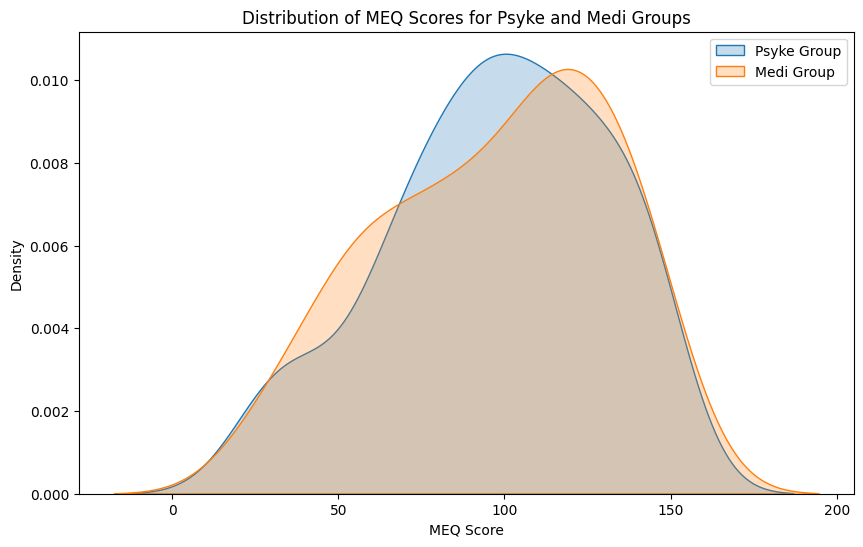

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop NaN values from MEQ30_sum for both groups
psyke_MEQ_clean = psyke['MEQ30_sum'].dropna()
medi_MEQ_clean = medi['MEQ30_sum'].dropna()

# Create a figure for plotting
plt.figure(figsize=(10, 6))

# Use seaborn to create a density plot
sns.kdeplot(psyke_MEQ_clean, label='Psyke Group', fill=True)
sns.kdeplot(medi_MEQ_clean, label='Medi Group', fill=True)

# Adding labels and title
plt.title('Distribution of MEQ Scores for Psyke and Medi Groups')
plt.xlabel('MEQ Score')
plt.ylabel('Density')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()


In [29]:
# Calculate mean MEQ sum score for both groups
mean_MEQ_psyke = psyke['MEQ30_sum'].mean()
mean_MEQ_medi = medi['MEQ30_sum'].mean()

# Calculate standard deviation for MEQ sum scores for both groups
std_MEQ_psyke = psyke['MEQ30_sum'].std()
std_MEQ_medi = medi['MEQ30_sum'].std()

# Print the results for means and standard deviations
print(f"Mean MEQ sum score for Psyke group: {mean_MEQ_psyke:.2f} (stdev: {std_MEQ_psyke:.2f})")
print(f"Mean MEQ sum score for Medi group: {mean_MEQ_medi:.2f} (stdev: {std_MEQ_medi:.2f})")

# Test for normality before performing a t-test
from scipy.stats import shapiro
normality_psyke = shapiro(psyke['MEQ30_sum'].dropna())
normality_medi = shapiro(medi['MEQ30_sum'].dropna())
print(f"Normality test for Psyke group: Statistics={normality_psyke[0]:.3f}, p-value={normality_psyke[1]:.3f}")
print(f"Normality test for Medi group: Statistics={normality_medi[0]:.3f}, p-value={normality_medi[1]:.3f}")

from scipy.stats import mannwhitneyu

# Perform the Mann-Whitney U test
u_stat, p_value = mannwhitneyu(psyke['MEQ30_sum'].dropna(), medi['MEQ30_sum'].dropna())

print(f"Mann-Whitney U test results -- U statistic: {u_stat}, p-value: {p_value}")


Mean MEQ sum score for Psyke group: 97.39 (stdev: 32.94)
Mean MEQ sum score for Medi group: 97.18 (stdev: 34.20)
Normality test for Psyke group: Statistics=0.964, p-value=0.003
Normality test for Medi group: Statistics=0.954, p-value=0.017
Mann-Whitney U test results -- U statistic: 3900.5, p-value: 1.0


In [205]:
# Calculate sum variables for the subscales of MEQ for both groups
psyke['mystical_sum'] = psyke[['MEQ30_Q1_mystical', 'MEQ30_Q2_mystical', 'MEQ30_Q3_mystical', 'MEQ30_Q4_mystical', 'MEQ30_Q5_mystical', 'MEQ30_Q6_mystical', 'MEQ30_Q7_mystical', 'MEQ30_Q8_mystical', 'MEQ30_Q9_mystical', 'MEQ30_Q10_mystical','MEQ30_Q11_mystical', 'MEQ30_Q12_mystical', 'MEQ30_Q13_mystical', 'MEQ30_Q14_mystical', 'MEQ30_Q15_mystical']].sum(axis=1)
psyke['positive_mood_sum'] = psyke[['MEQ30_Q16_positive_mood', 'MEQ30_Q17_positive_mood', 'MEQ30_Q18_positive_mood', 'MEQ30_Q19_positive_mood','MEQ30_Q20_positive_mood', 'MEQ30_Q21_positive_mood']].sum(axis=1)
psyke['transcendence_sum'] = psyke[['MEQ30_Q22_transcendence', 'MEQ30_Q23_transcendence', 'MEQ30_Q24_transcendence', 'MEQ30_Q25_transcendence', 'MEQ30_Q26_transcendence', 'MEQ30_Q27_transcendence']].sum(axis=1)
psyke['ineffability_sum'] = psyke[['MEQ30_Q28_ineffability', 'MEQ30_Q29_ineffability', 'MEQ30_Q30_ineffability']].sum(axis=1)

medi['mystical_sum'] = medi[['MEQ30_Q1_mystical', 'MEQ30_Q2_mystical', 'MEQ30_Q3_mystical', 'MEQ30_Q4_mystical', 'MEQ30_Q5_mystical', 'MEQ30_Q6_mystical', 'MEQ30_Q7_mystical', 'MEQ30_Q8_mystical', 'MEQ30_Q9_mystical', 'MEQ30_Q10_mystical', 'MEQ30_Q11_mystical', 'MEQ30_Q12_mystical', 'MEQ30_Q13_mystical', 'MEQ30_Q14_mystical', 'MEQ30_Q15_mystical']].sum(axis=1)
medi['positive_mood_sum'] = medi[['MEQ30_Q16_positive_mood', 'MEQ30_Q17_positive_mood', 'MEQ30_Q18_positive_mood', 'MEQ30_Q19_positive_mood','MEQ30_Q20_positive_mood', 'MEQ30_Q21_positive_mood']].sum(axis=1)
medi['transcendence_sum'] = medi[['MEQ30_Q22_transcendence', 'MEQ30_Q23_transcendence', 'MEQ30_Q24_transcendence', 'MEQ30_Q25_transcendence', 'MEQ30_Q26_transcendence', 'MEQ30_Q27_transcendence']].sum(axis=1)
medi['ineffability_sum'] = medi[['MEQ30_Q28_ineffability', 'MEQ30_Q29_ineffability', 'MEQ30_Q30_ineffability']].sum(axis=1)

# Print the means of these sum variables for both groups
print("Psyke Group - Subscale Means:")
print(f"Transcendence: {psyke['transcendence_sum'].mean():.2f}")
print(f"Ineffability: {psyke['ineffability_sum'].mean():.2f}")
print(f"Positive Mood: {psyke['positive_mood_sum'].mean():.2f}")
print(f"Mysticality: {psyke['mystical_sum'].mean():.2f}")

print("\nMedi Group - Subscale Means:")
print(f"Transcendence: {medi['transcendence_sum'].mean():.2f}")
print(f"Ineffability: {medi['ineffability_sum'].mean():.2f}")
print(f"Positive Mood: {medi['positive_mood_sum'].mean():.2f}")
print(f"Mysticality: {medi['mystical_sum'].mean():.2f}")

# Perform Mann-Whitney U tests for each subscale
from scipy.stats import mannwhitneyu

# Transcendence
u_stat_trans, p_value_trans = mannwhitneyu(psyke['transcendence_sum'].dropna(), medi['transcendence_sum'].dropna())
print(f"Mann-Whitney U test for Transcendence: U statistic: {u_stat_trans}, p-value: {p_value_trans}")

# Ineffability
u_stat_ineff, p_value_ineff = mannwhitneyu(psyke['ineffability_sum'].dropna(), medi['ineffability_sum'].dropna())
print(f"Mann-Whitney U test for Ineffability: U statistic: {u_stat_ineff}, p-value: {p_value_ineff}")

# Positive Mood
u_stat_pos_mood, p_value_pos_mood = mannwhitneyu(psyke['positive_mood_sum'].dropna(), medi['positive_mood_sum'].dropna())
print(f"Mann-Whitney U test for Positive Mood: U statistic: {u_stat_pos_mood}, p-value: {p_value_pos_mood}")

# Mysticality
u_stat_myst, p_value_myst = mannwhitneyu(psyke['mystical_sum'].dropna(), medi['mystical_sum'].dropna())
print(f"Mann-Whitney U test for Mysticality: U statistic: {u_stat_myst}, p-value: {p_value_myst}")


Psyke Group - Subscale Means:
Transcendence: 15.68
Ineffability: 9.94
Positive Mood: 18.81
Mysticality: 40.25

Medi Group - Subscale Means:
Transcendence: 16.23
Ineffability: 9.97
Positive Mood: 20.75
Mysticality: 50.23
Mann-Whitney U test for Transcendence: U statistic: 4337.0, p-value: 0.7051622634454345
Mann-Whitney U test for Ineffability: U statistic: 4596.5, p-value: 0.7744537749157376
Mann-Whitney U test for Positive Mood: U statistic: 4199.0, p-value: 0.4639178120974393
Mann-Whitney U test for Mysticality: U statistic: 3476.0, p-value: 0.009766959458463393


/var/folders/1_/ff72pvzx3tqc2qtzyq7wlzxm0000gn/T/ipykernel_72341/3581479162.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  psyke['mystical_sum'] = psyke[['MEQ30_Q1_mystical', 'MEQ30_Q2_mystical', 'MEQ30_Q3_mystical', 'MEQ30_Q4_mystical', 'MEQ30_Q5_mystical', 'MEQ30_Q6_mystical', 'MEQ30_Q7_mystical', 'MEQ30_Q8_mystical', 'MEQ30_Q9_mystical', 'MEQ30_Q10_mystical','MEQ30_Q11_mystical', 'MEQ30_Q12_mystical', 'MEQ30_Q13_mystical', 'MEQ30_Q14_mystical', 'MEQ30_Q15_mystical']].sum(axis=1)
/var/folders/1_/ff72pvzx3tqc2qtzyq7wlzxm0000gn/T/ipykernel_72341/3581479162.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

### Checking word distributions

In [32]:
total_words = df['Open_report typo-corrected'].str.split().apply(lambda x : len(x)).sum()
print(f"Total number of words in 'Open_report typo-corrected': {total_words}")


Total number of words in 'Open_report typo-corrected': 73003


<Axes: >

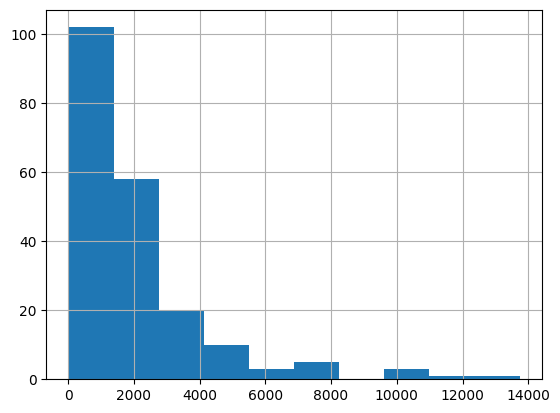

In [33]:
# Histogram of the answer lengths (in tokens)

df['Open_report typo-corrected'].str.len().hist()

<Axes: >

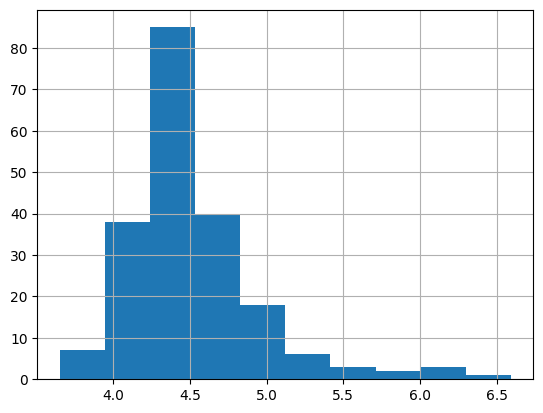

In [34]:
# Histogram of word lengths

df['Open_report typo-corrected'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

Text(0, 0.5, 'Count of Answers')

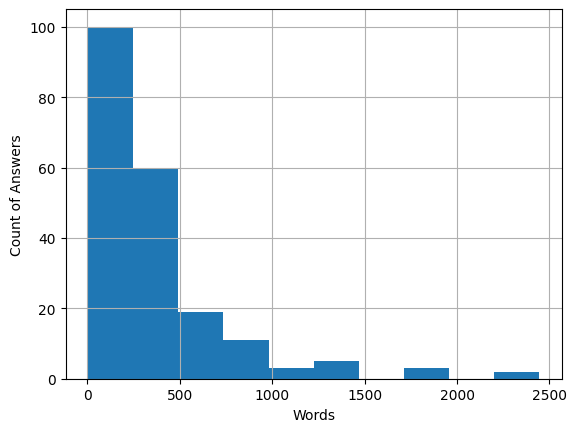

In [35]:
# Histogram of answer lengths (in words)

ax = df['Open_report typo-corrected'].str.split().apply(lambda x : len(x)).hist()
ax.set_xlabel("Words")
ax.set_ylabel("Count of Answers")


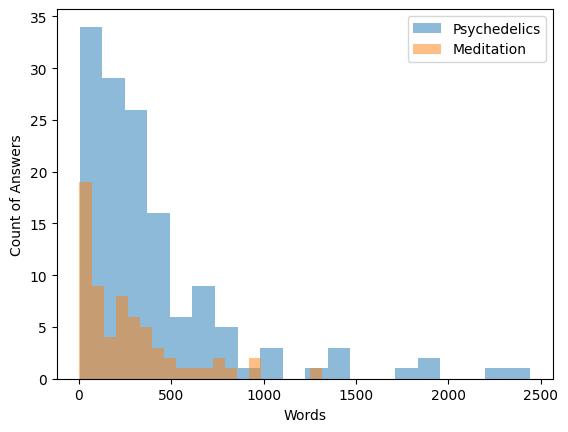

In [36]:
# Creating the histogram for psyke and medi datasets separately

# Calculate the word counts per document for each group
words_psyke = psyke['Open_report typo-corrected'].str.split().apply(lambda x: len(x))
words_medi = medi['Open_report typo-corrected'].str.split().apply(lambda x: len(x))

# Plotting both histograms
plt.hist(words_psyke, bins=20, alpha=0.5, label='Psychedelics', color='C0')
plt.hist(words_medi, bins=20, alpha=0.5, label='Meditation', color='C1')

# Adding labels and title
plt.xlabel("Words")
plt.ylabel("Count of Answers")

# Display the legend
plt.legend()

# Show the plot
plt.show()

In [37]:
# Average length of the documents for all groups
avg_answer_length = round(df['Open_report typo-corrected'].str.split().apply(lambda x : len(x)).mean(), 2)
std_answer_length = round(df['Open_report typo-corrected'].str.split().apply(lambda x : len(x)).std(), 2)
print(f"Average length of answers in words for all groups: {avg_answer_length} (std: {std_answer_length})")

# Average length of the documents for 'psychedelics' group
avg_answer_length_psyke = round(psyke['Open_report typo-corrected'].str.split().apply(lambda x : len(x)).mean(), 2)
std_answer_length_psyke = round(psyke['Open_report typo-corrected'].str.split().apply(lambda x : len(x)).std(), 2)
print(f"Average length of answers in words for 'psychedelics' group: {avg_answer_length_psyke} (std: {std_answer_length_psyke})")

# Average length of the documents for 'meditation' group
avg_answer_length_medi = round(medi['Open_report typo-corrected'].str.split().apply(lambda x : len(x)).mean(), 2)
std_answer_length_medi = round(medi['Open_report typo-corrected'].str.split().apply(lambda x : len(x)).std(), 2)
print(f"Average length of answers in words for 'meditation' group: {avg_answer_length_medi} (std: {std_answer_length_medi})")


Average length of answers in words for all groups: 359.62 (std: 401.23)
Average length of answers in words for 'psychedelics' group: 400.41 (std: 443.66)
Average length of answers in words for 'meditation' group: 273.03 (std: 274.86)


<BarContainer object of 10 artists>

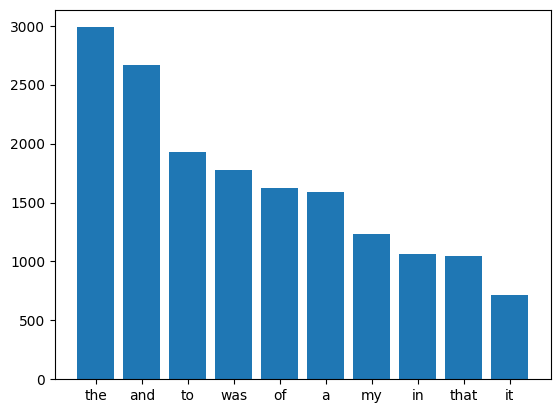

In [38]:
# Visualising the most common stopwords in the dataset
stop_words = set(stopwords.words('english'))

corpus = []
words = df['Open_report typo-corrected'].str.split()
words = words.values.tolist()
corpus = [word for i in words for word in i]

from collections import defaultdict

dic=defaultdict(int)
for word in corpus:
    if word in stop_words:
        dic[word]+=1

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y)

# Word frequency comparisons between the groups

In [39]:
from collections import Counter
import spacy


In [40]:
nlp = spacy.load("en_core_web_sm")

psyke_all_text = psyke['Open_report typo-corrected'].str.cat(sep=' ')

psyke_doc = nlp(psyke_all_text, disable=['ner'])

In [41]:
medi_all_text = medi['Open_report typo-corrected'].str.cat(sep=' ')

medi_doc = nlp(medi_all_text, disable=['ner'])


In [42]:
psyke_words = [token.lemma_ for token in psyke_doc if not token.is_stop and not token.is_punct and token.lemma_ != ' '] 
psyke_word_freq = Counter(psyke_words) 
psyke_word_freq.most_common(20)

[('feel', 569),
 ('experience', 388),
 ('like', 342),
 ('time', 241),
 ('start', 222),
 ('go', 175),
 ('life', 159),
 ('friend', 158),
 ('know', 144),
 ('think', 140),
 ('come', 134),
 ('trip', 134),
 ('take', 133),
 ('see', 129),
 ('thing', 114),
 ('get', 112),
 ('remember', 111),
 ('feeling', 107),
 ('body', 101),
 ('look', 101)]

In [43]:
total_psyke_words = len(psyke_words)
print(f"Total words in Psyke dataset after processing: {total_psyke_words}")


Total words in Psyke dataset after processing: 22085


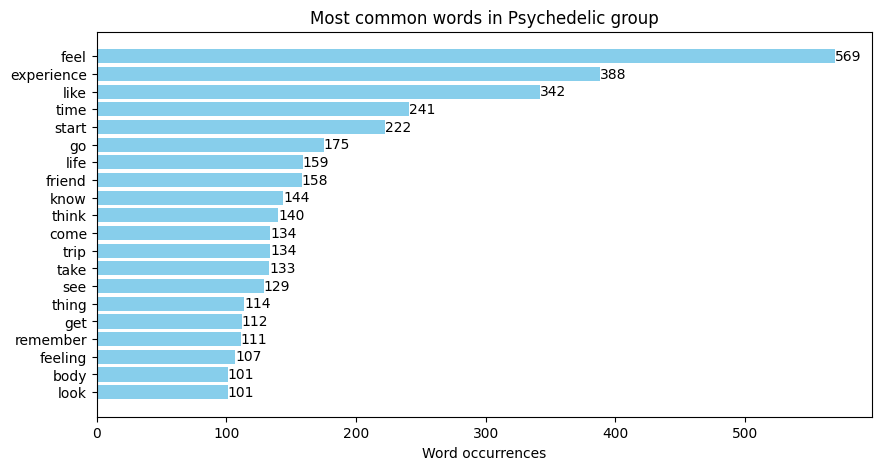

In [44]:
psyke_common_words = psyke_word_freq.most_common(20)
words, counts = zip(*psyke_common_words)

plt.figure(figsize=(10, 5))
bars = plt.barh(words, counts, color='skyblue')
plt.xlabel('Word occurrences')
plt.title('Most common words in Psychedelic group')
plt.gca().invert_yaxis()

# Add counts next to the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width()}', 
             va='center', ha='left')

plt.show()


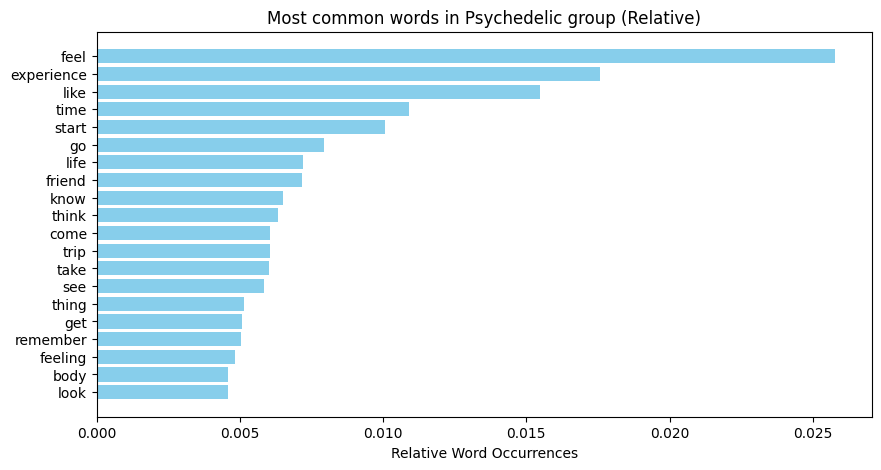

In [45]:
relative_psyke_counts = [count / total_psyke_words for count in counts]

plt.figure(figsize=(10, 5))
bars = plt.barh(words, relative_psyke_counts, color='skyblue')
plt.xlabel('Relative Word Occurrences')
plt.title('Most common words in Psychedelic group (Relative)')
plt.gca().invert_yaxis()

plt.show()


In [46]:
medi_words = [token.lemma_ for token in medi_doc if not token.is_stop and not token.is_punct and token.lemma_ != ' '] 
medi_word_freq = Counter(medi_words) 
medi_word_freq.most_common(20)

[('experience', 190),
 ('feel', 154),
 ('like', 91),
 ('meditation', 89),
 ('time', 80),
 ('body', 77),
 ('day', 69),
 ('practice', 57),
 ('retreat', 56),
 ('mind', 52),
 ('life', 50),
 ('know', 42),
 ('come', 38),
 ('year', 37),
 ('happen', 36),
 ('love', 36),
 ('start', 34),
 ('sense', 34),
 ('go', 34),
 ('sit', 32)]

In [47]:
total_medi_words = len(medi_words)
print(f"Total words in Psyke dataset after processing: {total_psyke_words}")

Total words in Psyke dataset after processing: 22085


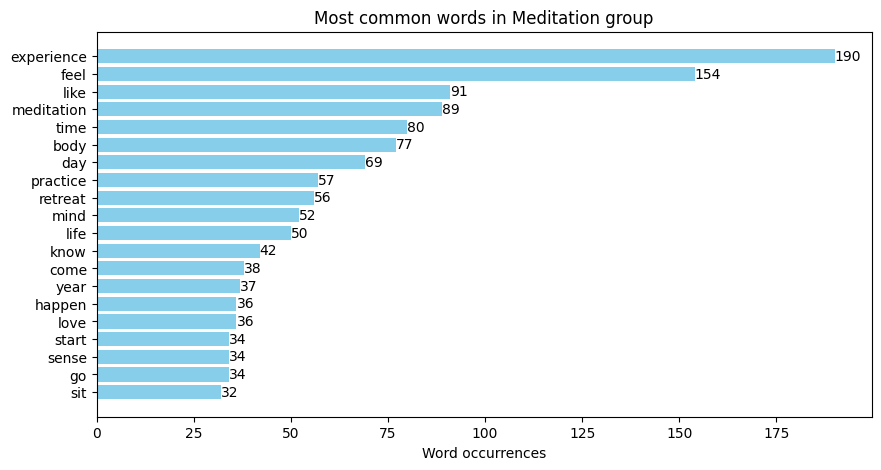

In [48]:
medi_common_words = medi_word_freq.most_common(20)
words, counts = zip(*medi_common_words)

plt.figure(figsize=(10, 5))
bars = plt.barh(words, counts, color='skyblue')
plt.xlabel('Word occurrences')
plt.title('Most common words in Meditation group')
plt.gca().invert_yaxis()

# Add counts next to the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width()}', 
             va='center', ha='left')

plt.show()



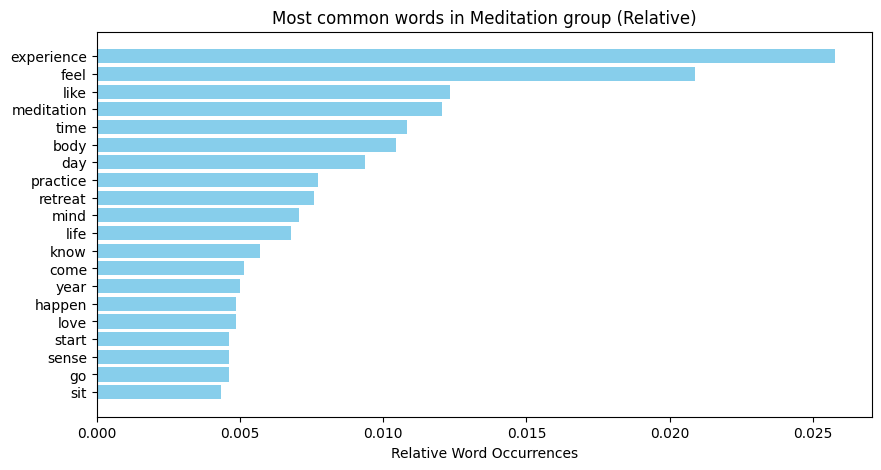

In [49]:
relative_medi_counts = [count / total_medi_words for count in counts]

plt.figure(figsize=(10, 5))
bars = plt.barh(words, relative_medi_counts, color='skyblue')
plt.xlabel('Relative Word Occurrences')
plt.title('Most common words in Meditation group (Relative)')
plt.gca().invert_yaxis()

plt.show()


### Most common ngrams

In [50]:
# Defining the functions for finding most common ngrams without stopwords

from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngram_without_stop(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    words_freq = [(word, count) for word, count in words_freq if all(w not in stop_words for w in word.split())]
    return words_freq[:10]


Text(0.5, 1.0, 'Psychedelic group most common bigrams')

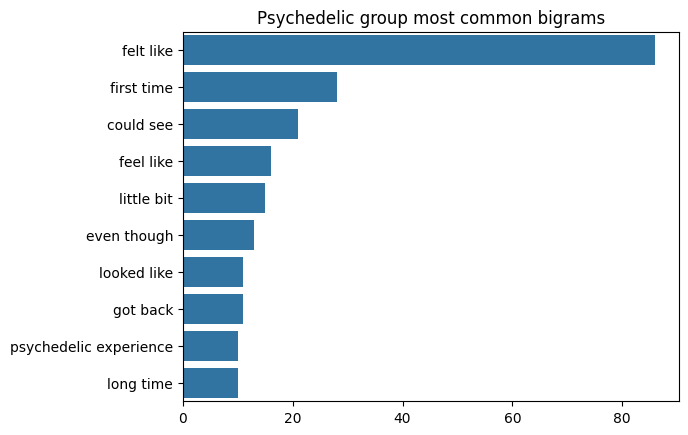

In [51]:
# Top bigrams without stopwords psychedelic group – no lemmatising yet in order to preserve the meaning of the words
top_n_bigrams_psyke=get_top_ngram_without_stop(psyke['Open_report typo-corrected'],2)[:10] 

x,y=map(list,zip(*top_n_bigrams_psyke)) 

sns.barplot(x=y,y=x).set_title("Psychedelic group most common bigrams")


Text(0.5, 1.0, 'Meditation group most common bigrams')

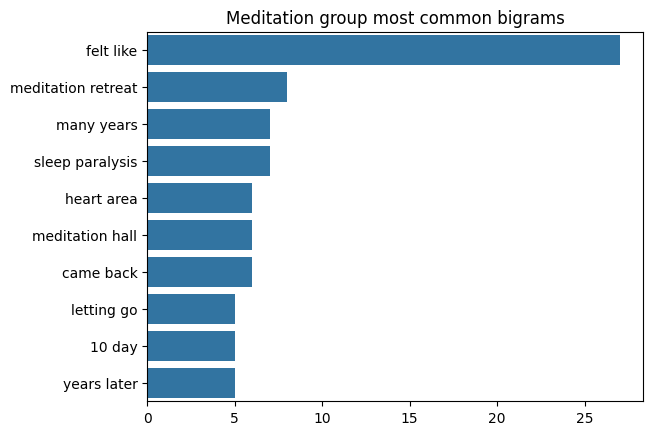

In [52]:
# Top bigrams without stopwords meditation group – also without lemmatising
top_n_bigrams_medi=get_top_ngram_without_stop(medi['Open_report typo-corrected'],2)[:10] 

x,y=map(list,zip(*top_n_bigrams_medi)) 

sns.barplot(x=y,y=x).set_title("Meditation group most common bigrams")

### Creating pre-processed dataframes for both groups
Previously the stopwords were removed and words lemmatised while calculating the frequencies, but I didn't touch the actual dataframes. Now, we need preprocessed dataframes for TF-IDF LDA and Sentiment analysis.  

In [57]:
lemmatizer = WordNetLemmatizer()
nltk.download('averaged_perceptron_tagger')

# Creating the pre-processing functions
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

# Defining a mapping of words to their base forms
manual_mapping = {
    'felt': 'feel',
    'talked': 'talk',
    'thought': 'think',
}

def preprocess_text(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [manual_mapping.get(token, token) for token in tokens] 
    tokens = [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in tokens if token.isalpha() and token not in stop_words]
    return ' '.join(tokens)



[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/konsta/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [58]:
# Pre-processing psyke and medi datasets

psyke_pre_processed_answers = psyke['Open_report typo-corrected'].apply(preprocess_text)
medi_pre_processed_answers = medi['Open_report typo-corrected'].apply(preprocess_text)



## TF-IDF analysis

In [59]:
# Count the number of words in psyke and medi datasets separately 
# This is used to check that the concatenation went right in the next step

# Function to count words in a dataset
def count_words(dataset):
    return sum(len(answer.split()) for answer in dataset)

# Counting words in psyke_pre_processed_answers
psyke_word_count = count_words(psyke_pre_processed_answers)
print(f"Total words in psyke dataset: {psyke_word_count}")

# Counting words in medi_pre_processed_answers
medi_word_count = count_words(medi_pre_processed_answers)
print(f"Total words in medi dataset: {medi_word_count}")


Total words in psyke dataset: 24979
Total words in medi dataset: 8160


In [60]:
# Combine psyke and medi datasets into one dataset for TF-IDF analysis
# Concatenate all psyke open answers into one string
psyke_combined_answers = " ".join(psyke_pre_processed_answers)
# Concatenate all medi open answers into one string
medi_combined_answers = " ".join(medi_pre_processed_answers)

# Create a new dataset with these combined answers
combined_dataset = pd.DataFrame({
    'dataset': ['psyke', 'medi'],
    'combined_answers': [psyke_combined_answers, medi_combined_answers]
})

combined_dataset

,dataset,combined_answers
0,psyke,friend apartment take lsd let say fairly avera...
1,medi,fundamental concept buddhism call anicca regar...


In [61]:
# Count the word counts of each combined_answers row
combined_dataset['word_count'] = combined_dataset['combined_answers'].apply(lambda x: len(x.split()))
combined_dataset


,dataset,combined_answers,word_count
0,psyke,friend apartment take lsd let say fairly avera...,24979
1,medi,fundamental concept buddhism call anicca regar...,8160


In [62]:
combined_dataset.drop(columns=['word_count'], inplace=True)
combined_dataset


,dataset,combined_answers
0,psyke,friend apartment take lsd let say fairly avera...
1,medi,fundamental concept buddhism call anicca regar...


In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the combined dataset
tfidf_matrix = tfidf_vectorizer.fit_transform(combined_dataset['combined_answers'])

# Convert the TF-IDF matrix to a dense DataFrame for easier manipulation and viewing
df_tfidf = pd.DataFrame(tfidf_matrix.todense(), columns=tfidf_vectorizer.get_feature_names_out(), index=combined_dataset['dataset'])

# Display the TF-IDF DataFrame
df_tfidf


,abandon,abandonment,abdicate,abdomen,abide,ability,abject,able,abroad,absence,absent,absolute,absolutely,absorb,absorbance,absorbed,absorbs,abstract,abstraction,absurd,abundance,abuse,abusive,accept,acceptable,acceptance,accepted,access,accessible,accidentally,accommodate,accompanies,accompany,accord,account,accumulate,accumulates,accurate,accurately,accuse,ache,achievable,achieve,acid,acknowledge,acquaintance,acquire,across,act,action,activate,active,activity,actual,actually,acuity,acupressure,acute,adapt,add,addiction,addition,additional,address,adjust,administer,admit,admonishment,adolescent,adopt,adult,advaita,advance,advanced,adventure,adversity,advertise,advice,advise,affair,affect,affected,affection,afford,aforementioned,afraid,africa,aftereffect,afterglow,afternoon,afterward,afterwards,agapeschoolinz,agave,age,agency,agenda,aggressive,agitate,agitation,...,whereby,whether,whilst,whirl,whirlpool,whirlwind,whisper,whistle,white,whiée,whole,wholeness,whose,wicker,wide,wideness,wider,wife,wild,wilder,wilderness,will,willendorf,willful,william,willie,willing,willingness,win,wind,window,windy,wing,wintry,wire,wisdom,wise,wish,witch,witgehandschoend,withdraw,withhold,within,without,witness,wo,woke,woken,woman,wonder,wonderful,wonderland,wood,wooden,word,wordless,work,workshop,world,worldview,worm,wormhole,worn,worried,worry,worth,worthy,would,wound,woven,wow,wrap,wrinkle,wrist,write,writhe,wrong,yawn,yea,yeah,year,yearn,yell,yellow,yellowish,yes,yet,yin,yoga,yogi,yoginis,york,yorker,young,youth,youtube,zazen,zen,zero,zone
dataset,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
psyke,0.004276,0.001069,0.001069,0.001069,0.000000,0.003803,0.001069,0.034224,0.000000,0.000000,0.000761,0.007605,0.016033,0.001069,0.000000,0.002138,0.001069,0.003207,0.002138,0.004276,0.000000,0.004276,0.000761,0.010689,0.000000,0.003042,0.008551,0.002282,0.000000,0.004276,0.001069,0.001069,0.003042,0.005344,0.002138,0.001069,0.001069,0.000000,0.000761,0.002138,0.000000,0.001069,0.002282,0.009887,0.001069,0.001069,0.000761,0.005324,0.005324,0.003803,0.002282,0.001069,0.003042,0.005324,0.019013,0.001069,0.001069,0.000000,0.001069,0.000761,0.002138,0.001069,0.000000,0.001521,0.002138,0.001069,0.001069,0.000000,0.001069,0.001069,0.006084,0.000000,0.000000,0.000761,0.003207,0.001069,0.000000,0.002138,0.000761,0.000000,0.000761,0.003207,0.001521,0.001069,0.000000,0.009126,0.001069,0.001069,0.004276,0.002282,0.000000,0.009126,0.000000,0.001069,0.004563,0.002138,0.000000,0.002138,0.001069,0.001069,...,0.000000,0.005324,0.001521,0.001069,0.001069,0.001069,0.000761,0.001069,0.010647,0.001069,0.031942,0.000000,0.002138,0.000000,0.004276,0.000000,0.000000,0.012168,0.003207,0.002138,0.001069,0.001069,0.001069,0.000000,0.001069,0.001069,0.001069,0.000000,0.001069,0.011758,0.004563,0.000761,0.002138,0.001069,0.001069,0.000761,0.000761,0.002282,0.002138,0.001069,0.000000,0.000000,0.007605,0.028139,0.001521,0.005344,0.008366,0.001069,0.004563,0.016732,0.004563,0.001069,0.005344,0.005344,0.027379,0.000000,0.040308,0.000000,0.053997,0.001069,0.001069,0.000000,0.001069,0.005324,0.007605,0.002138,0.002138,0.095065,0.000000,0.001069,0.005344,0.002138,0.002138,0.001069,0.024337,0.003207,0.007605,0.002138,0.001069,0.003207,0.057039,0.005344,0.003207,0.003803,0.001069,0.005324,0.014450,0.000000,0.006084,0.000000,0.001069,0.001069,0.001069,0.012168,0.001069,0.000761,0.000000,0.000761,0.000000,0.001069
medi,0.000000,0.000000,0.000000,0.000000,0.003321,0.007088,0.000000,0.040165,0.003321,0.006641,0.004725,0.007088,0.000000,0.000000,0.003321,0.000000,0.000000,0.000000,0.000000,0.000000,0.003321,0.000000,0.002363,0.000000,0.003321,0.009451,0.000000,0.002363,0.003321,0.000000,0.000000,0.000000,0.002363,0.000000,0.000000,0.000000,0.000000,0.003321,0.009451,0.000000,0.003321,0.000000,0.002363,0.002363,0.000000,0.000000,0.004725,0.0

In [64]:
# Saving the top 20 words along with their TF-IDF scores for each group from the standard TF-IDF analysis

def get_top_n_words_standard_with_scores(df, n=20):
    top_words_scores_dict = {}
    for index, row in df.iterrows():
        top_n_words_scores = row.sort_values(ascending=False).head(n)
        top_words_scores_dict[index] = dict(top_n_words_scores)
    return top_words_scores_dict

# Get top 20 words and their TF-IDF scores for psyke and medi groups from the standard TF-IDF DataFrame
standard_top_words_scores = get_top_n_words_standard_with_scores(df_tfidf, 20)

# Saving top words and their scores for psyke and medi groups into separate variables including the scores
psyke_standard_top_words_scores = standard_top_words_scores['psyke']
medi_standard_top_words_scores = standard_top_words_scores['medi']

psyke_standard_top_words_scores

{'feel': 0.4943401564343955,
 'experience': 0.2654226378393908,
 'like': 0.24564903158201498,
 'go': 0.1870887361274789,
 'time': 0.1840466428571134,
 'start': 0.1703572231404686,
 'trip': 0.14323112422816428,
 'one': 0.14145733707199626,
 'could': 0.1361336738488566,
 'get': 0.1330915805784911,
 'take': 0.12776791735535145,
 'friend': 0.12016268417943768,
 'life': 0.1194021608618463,
 'think': 0.11788111422666354,
 'come': 0.10114960123965323,
 'would': 0.09506541469892221,
 'see': 0.09126279811096533,
 'everything': 0.09050227479337394,
 'make': 0.08746018152300843,
 'thing': 0.08669965820541706}

In [65]:
medi_standard_top_words_scores

{'experience': 0.4063721327303167,
 'feel': 0.3969216180156582,
 'like': 0.21263658107981687,
 'meditation': 0.21263658107981687,
 'time': 0.18428503693584128,
 'body': 0.1771971508998474,
 'day': 0.16065875014919498,
 'retreat': 0.13466983468388402,
 'practice': 0.1323072060052194,
 'go': 0.1252193199692255,
 'life': 0.12285669129056086,
 'could': 0.1181314339332316,
 'mind': 0.1110435478972377,
 'one': 0.10159303318257917,
 'think': 0.09923040450391454,
 'love': 0.09450514714658527,
 'come': 0.08977988978925601,
 'year': 0.08505463243192675,
 'start': 0.08269200375326212,
 'happen': 0.08032937507459749}

In [66]:

# Custom TF-IDF Vectorizer without smoothing
class CustomTfidfVectorizer(TfidfVectorizer):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def fit_transform(self, raw_documents, y=None):
        # Fit the model
        X = super().fit_transform(raw_documents, y=y)
        # Compute IDF without adding 1 to the denominator for smoothing
        self._tfidf.idf_ = np.log(X.shape[0] / np.bincount(X.nonzero()[1])) 
        # Transform the documents using the modified IDF
        return super().transform(raw_documents)

# Initialize the custom TF-IDF Vectorizer without smoothing
custom_tfidf_vectorizer = CustomTfidfVectorizer()

# Fit and transform the combined dataset
custom_tfidf_matrix = custom_tfidf_vectorizer.fit_transform(combined_dataset['combined_answers'])

# Convert the TF-IDF matrix to a dense DataFrame for easier manipulation and viewing
custom_df_tfidf = pd.DataFrame(custom_tfidf_matrix.todense(), columns=custom_tfidf_vectorizer.get_feature_names_out(), index=combined_dataset['dataset'])

# Display the custom TF-IDF DataFrame without smoothing
custom_df_tfidf

,abandon,abandonment,abdicate,abdomen,abide,ability,abject,able,abroad,absence,absent,absolute,absolutely,absorb,absorbance,absorbed,absorbs,abstract,abstraction,absurd,abundance,abuse,abusive,accept,acceptable,acceptance,accepted,access,accessible,accidentally,accommodate,accompanies,accompany,accord,account,accumulate,accumulates,accurate,accurately,accuse,ache,achievable,achieve,acid,acknowledge,acquaintance,acquire,across,act,action,activate,active,activity,actual,actually,acuity,acupressure,acute,adapt,add,addiction,addition,additional,address,adjust,administer,admit,admonishment,adolescent,adopt,adult,advaita,advance,advanced,adventure,adversity,advertise,advice,advise,affair,affect,affected,affection,afford,aforementioned,afraid,africa,aftereffect,afterglow,afternoon,afterward,afterwards,agapeschoolinz,agave,age,agency,agenda,aggressive,agitate,agitation,...,whereby,whether,whilst,whirl,whirlpool,whirlwind,whisper,whistle,white,whiée,whole,wholeness,whose,wicker,wide,wideness,wider,wife,wild,wilder,wilderness,will,willendorf,willful,william,willie,willing,willingness,win,wind,window,windy,wing,wintry,wire,wisdom,wise,wish,witch,witgehandschoend,withdraw,withhold,within,without,witness,wo,woke,woken,woman,wonder,wonderful,wonderland,wood,wooden,word,wordless,work,workshop,world,worldview,worm,wormhole,worn,worried,worry,worth,worthy,would,wound,woven,wow,wrap,wrinkle,wrist,write,writhe,wrong,yawn,yea,yeah,year,yearn,yell,yellow,yellowish,yes,yet,yin,yoga,yogi,yoginis,york,yorker,young,youth,youtube,zazen,zen,zero,zone
dataset,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
psyke,0.017651,0.004413,0.004413,0.004413,0.000000,0.0,0.004413,0.0,0.000000,0.000000,0.0,0.0,0.06619,0.004413,0.000000,0.008825,0.004413,0.013238,0.008825,0.017651,0.000000,0.017651,0.0,0.044127,0.000000,0.0,0.035301,0.0,0.000000,0.017651,0.004413,0.004413,0.0,0.022063,0.008825,0.004413,0.004413,0.000000,0.0,0.008825,0.000000,0.004413,0.0,0.0,0.004413,0.004413,0.0,0.0,0.0,0.0,0.0,0.004413,0.0,0.0,0.0,0.004413,0.004413,0.000000,0.004413,0.0,0.008825,0.004413,0.000000,0.0,0.008825,0.004413,0.004413,0.000000,0.004413,0.004413,0.0,0.000000,0.000000,0.0,0.013238,0.004413,0.000000,0.008825,0.0,0.000000,0.0,0.013238,0.0,0.004413,0.000000,0.0,0.004413,0.004413,0.017651,0.0,0.000000,0.0,0.000000,0.004413,0.0,0.008825,0.000000,0.008825,0.004413,0.004413,...,0.000000,0.0,0.0,0.004413,0.004413,0.004413,0.0,0.004413,0.0,0.004413,0.0,0.000000,0.008825,0.000000,0.017651,0.000000,0.000000,0.0,0.013238,0.008825,0.004413,0.004413,0.004413,0.000000,0.004413,0.004413,0.004413,0.000000,0.004413,0.048539,0.0,0.0,0.008825,0.004413,0.004413,0.0,0.0,0.0,0.008825,0.004413,0.000000,0.000000,0.0,0.0,0.0,0.022063,0.0,0.004413,0.0,0.0,0.0,0.004413,0.022063,0.022063,0.0,0.000000,0.0,0.000000,0.0,0.004413,0.004413,0.000000,0.004413,0.0,0.0,0.008825,0.008825,0.0,0.000000,0.004413,0.022063,0.008825,0.008825,0.004413,0.0,0.013238,0.0,0.008825,0.004413,0.013238,0.0,0.022063,0.013238,0.0,0.004413,0.0,0.0,0.00000,0.0,0.000000,0.004413,0.004413,0.004413,0.0,0.004413,0.0,0.000000,0.0,0.000000,0.004413
medi,0.000000,0.000000,0.000000,0.000000,0.022168,0.0,0.000000,0.0,0.022168,0.044335,0.0,0.0,0.00000,0.000000,0.022168,0.000000,0.000000,0.000000,0.000000,0.000000,0.022168,0.000000,0.0,0.000000,0.022168,0.0,0.000000,0.0,0.022168,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.022168,0.0,0.000000,0.022168,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.022168,0.000000,0.0,0.000000,0.000000,0.022168,0.0,0.000000,0.000000,0.000000,0.022168,0.000000,0.000000,0.0,0.022168,0.022168,0.0,0.000000,0.000000,0.022168,0.000000,0.0,0.044335,0.0,0.000000,0.0,0.000000,0.022168,0.0,0.000000,0.000000,0.000000,0.0,0.022168,0.0,0.022168,0.000000,0.0,0.000000,0.022168,0.000000,0.000000,0.000000

In [67]:
# Saving the top 20 words along with their TF-IDF scores for each group into variables

def get_top_n_words_custom_with_scores(df, n=20):
    top_words_scores_dict = {}
    for index, row in df.iterrows():
        top_n_words_scores = row.sort_values(ascending=False).head(n)
        top_words_scores_dict[index] = dict(top_n_words_scores)
    return top_words_scores_dict

# Get top 20 words and their TF-IDF scores for psyke and medi groups from the custom TF-IDF DataFrame
top_words_scores = get_top_n_words_custom_with_scores(custom_df_tfidf, 20)

# Saving top words and their scores for psyke and medi groups into separate variables including the scores
psyke_top_words_scores = top_words_scores['psyke']
medi_top_words_scores = top_words_scores['medi']

psyke_top_words_scores

{'trip': 0.5912960462176498,
 'lsd': 0.3088859942928021,
 'mushroom': 0.2294581671889387,
 'laugh': 0.14120502596242382,
 'psychedelics': 0.14120502596242382,
 'dose': 0.11914174065579511,
 'ceremony': 0.11031642653314362,
 'psilocybin': 0.10149111241049212,
 'visuals': 0.08825314122651488,
 'desert': 0.08384048416518915,
 'loop': 0.08384048416518915,
 'step': 0.0794278271038634,
 'smoke': 0.07060251298121191,
 'girlfriend': 0.07060251298121191,
 'family': 0.07060251298121191,
 'therapy': 0.07060251298121191,
 'gram': 0.07060251298121191,
 'shape': 0.07060251298121191,
 'ayahuasca': 0.06618985591988616,
 'hallucination': 0.06618985591988616}

In [68]:

medi_top_words_scores

{'nyams': 0.22167554926073513,
 'dzogchen': 0.1995079943346616,
 'arise': 0.1773404394085881,
 'technique': 0.15517288448251457,
 'ngondro': 0.15517288448251457,
 'paralysis': 0.15517288448251457,
 'garden': 0.13300532955644107,
 'divinity': 0.13300532955644107,
 'tradition': 0.11083777463036756,
 'metta': 0.11083777463036756,
 'spectrum': 0.11083777463036756,
 'occasion': 0.11083777463036756,
 'transmission': 0.11083777463036756,
 'personally': 0.08867021970429405,
 'roof': 0.08867021970429405,
 'yin': 0.08867021970429405,
 'empowerment': 0.08867021970429405,
 'practise': 0.08867021970429405,
 'prayer': 0.08867021970429405,
 'compassionate': 0.08867021970429405}

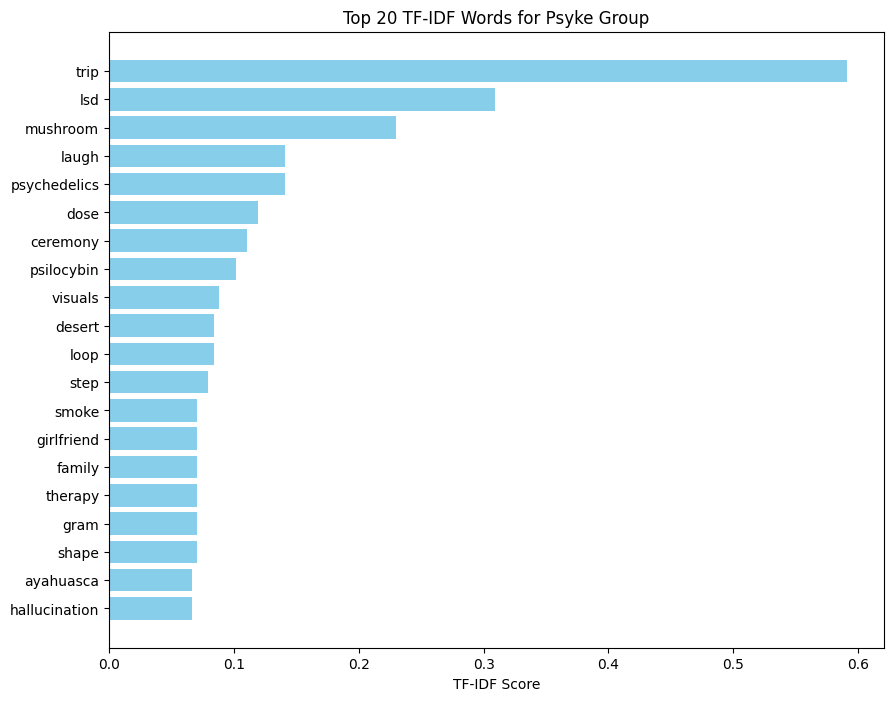

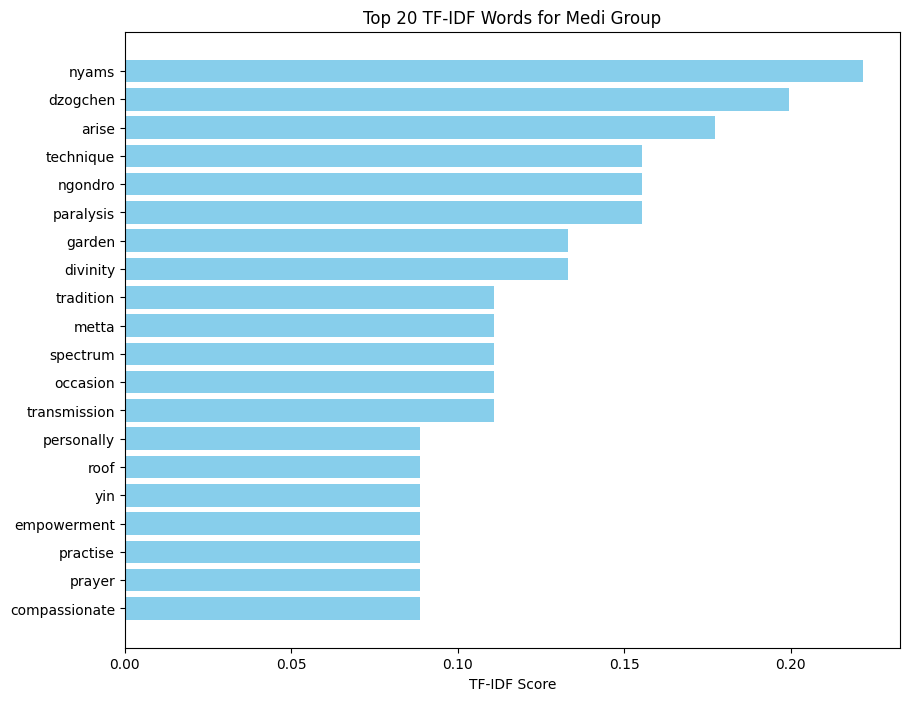

In [69]:
import matplotlib.pyplot as plt

# Function to plot horizontal bar charts for the top words and their TF-IDF scores
def plot_top_words_horizontal(top_words_scores, group_name):
    words = list(top_words_scores.keys())
    scores = list(top_words_scores.values())
    
    plt.figure(figsize=(10, 8))
    y_pos = range(len(words))
    plt.barh(y_pos, scores, color='skyblue')
    plt.yticks(y_pos, words)
    plt.xlabel('TF-IDF Score')
    plt.title(f'Top 20 TF-IDF Words for {group_name} Group')
    plt.gca().invert_yaxis()  # To display the highest score at the top
    plt.show()

# Plotting for Psyke group
plot_top_words_horizontal(psyke_top_words_scores, 'Psyke')

# Plotting for Medi group
plot_top_words_horizontal(medi_top_words_scores, 'Medi')

# Topic analysis with LDA

### Testing the LDA model with different number of topics (k) and checking words inside the topic models 

In [69]:
# Psychedelic data

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Define the number of topics for each model
num_topics_list = [3, 5, 10, 15, 20, 25, 30]

# Vectorizing the preprocessed text and creating document-term matrices
vectorizer_psyke = CountVectorizer()
psyke_dtm = vectorizer_psyke.fit_transform(psyke_pre_processed_answers)

# Function to print top 10 words for each topic
def print_top_words(model, vectorizer, n_top_words=10):
    feature_names = vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(model.components_):
        message = f"Topic #{topic_idx + 1}: "
        message += ", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)

# Train LDA models and print top words
for num_topics in num_topics_list:
    print(f"\nModel with {num_topics} topics:")
    lda_model_psyke = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda_model_psyke.fit(psyke_dtm)
    print_top_words(lda_model_psyke, vectorizer_psyke)


Model with 3 topics:
Topic #1: vision, like, city, love, wife, consciousness, look, go, move, call
Topic #2: feel, like, experience, time, go, start, could, one, get, take
Topic #3: feel, experience, like, go, time, start, one, get, think, take

Model with 5 topics:
Topic #1: like, remember, look, vision, feel, wife, call, move, mushroom, go
Topic #2: feel, like, go, start, could, get, friend, time, experience, take
Topic #3: feel, experience, like, go, start, time, one, get, think, friend
Topic #4: desert, note, love, make, experience, campsite, go, able, also, realise
Topic #5: feel, experience, like, time, one, life, start, take, could, go

Model with 10 topics:
Topic #1: like, feel, go, remember, look, vision, wife, love, experience, call
Topic #2: feel, go, start, experience, like, get, make, love, friend, could
Topic #3: feel, like, experience, go, start, time, get, remember, think, take
Topic #4: explain, happen, also, able, trauma, year, issue, spirit, suffer, train
Topic #5: 

In [70]:
# Meditation data

# Vectorize the preprocessed text
vectorizer_medi = CountVectorizer()
medi_dtm = vectorizer_medi.fit_transform(medi_pre_processed_answers)

# Train LDA models and print top words
for num_topics in num_topics_list:
    print(f"\nModel with {num_topics} topics:")
    lda_model_medi = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda_model_medi.fit(medi_dtm)
    print_top_words(lda_model_medi, vectorizer_medi)


Model with 3 topics:
Topic #1: experience, think, feel, note, like, time, use, could, mind, one
Topic #2: feel, experience, meditation, body, like, retreat, day, practice, time, go
Topic #3: experience, time, like, state, year, meditation, life, mind, yet, sense

Model with 5 topics:
Topic #1: note, use, guru, nyams, think, experience, like, could, mind, ngondro
Topic #2: feel, experience, like, time, go, begin, friend, day, heart, retreat
Topic #3: experience, time, mind, state, feel, earth, like, somehow, know, year
Topic #4: experience, feel, meditation, body, like, day, life, practice, retreat, time
Topic #5: feel, sleep, experience, back, time, room, retreat, like, day, body

Model with 10 topics:
Topic #1: breath, paper, course, sit, remember, old, work, large, use, stair
Topic #2: experience, feel, time, go, heart, retreat, happen, many, practice, garden
Topic #3: experience, time, different, level, state, colour, something, rainbow, like, could
Topic #4: experience, feel, medi

### Final topic models for psychedelic and meditation groups
Defined by using the model from Wheeler et al. (2021): https://link.springer.com/chapter/10.1007/978-3-030-74772-5_24. However, with meditation group the article's recommendations are not followed (it suggests using only 2 topics for meditation), because I wanted to have same amount of topics for the both model, which also would make sense for human readers. Therefore, the k parameter is set to 5 with both datasets.

In [71]:
lda_model_psyke = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model_psyke.fit(psyke_dtm)
print("Psychedelics:")
print_top_words(lda_model_psyke, vectorizer_psyke)

lda_model_medi = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model_medi.fit(medi_dtm)
print("Meditation:")
print_top_words(lda_model_medi, vectorizer_medi)


Psychedelics:
Topic #1: like, remember, look, vision, feel, wife, call, move, mushroom, go
Topic #2: feel, like, go, start, could, get, friend, time, experience, take
Topic #3: feel, experience, like, go, start, time, one, get, think, friend
Topic #4: desert, note, love, make, experience, campsite, go, able, also, realise
Topic #5: feel, experience, like, time, one, life, start, take, could, go
Meditation:
Topic #1: note, use, guru, nyams, think, experience, like, could, mind, ngondro
Topic #2: feel, experience, like, time, go, begin, friend, day, heart, retreat
Topic #3: experience, time, mind, state, feel, earth, like, somehow, know, year
Topic #4: experience, feel, meditation, body, like, day, life, practice, retreat, time
Topic #5: feel, sleep, experience, back, time, room, retreat, like, day, body


### Analysing the topics

In [73]:
# Get the topic distribution for each document
psyke_topic_distribution = lda_model_psyke.transform(psyke_dtm)

# Convert the topic distribution to a DataFrame
psyke_topic_distribution_df = pd.DataFrame(psyke_topic_distribution, columns=[f'Topic_{i+1}' for i in range(lda_model_psyke.n_components)])

# Concatenate the original DataFrame with the topic distribution DataFrame
psyke_with_topics = pd.concat([psyke_pre_processed_answers.reset_index(drop=True), psyke_topic_distribution_df], axis=1)

psyke_with_topics.head(5)

,Open_report typo-corrected,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5
0,friend apartment take lsd let say fairly avera...,0.001735,0.001766,0.992994,0.001742,0.001764
1,mean last experience take ketamine experienced...,0.003481,0.003516,0.003533,0.003489,0.985981
2,first time eat mushroom get away depression ay...,0.015494,0.015703,0.937385,0.015521,0.015898
3,close friend take shrooms nice walk around tow...,0.006512,0.973672,0.006681,0.006493,0.006641
4,many testimonial experienced connection nature...,0.003412,0.003503,0.986169,0.003429,0.003487


In [74]:
# Get the topic distribution for each document
medi_topic_distribution = lda_model_medi.transform(medi_dtm)

# Convert the topic distribution to a DataFrame
medi_topic_distribution_df = pd.DataFrame(medi_topic_distribution, columns=[f'Topic_{i+1}' for i in range(lda_model_medi.n_components)])

# Concatenate the original DataFrame with the topic distribution DataFrame
medi_with_topics = pd.concat([medi_pre_processed_answers.reset_index(drop=True), medi_topic_distribution_df], axis=1)

medi_with_topics.head(5)

,Open_report typo-corrected,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5
0,fundamental concept buddhism call anicca regar...,0.005327,0.005325,0.005311,0.978665,0.005372
1,developed positive feeling thought mind look l...,0.012775,0.012790,0.012735,0.012977,0.948723
2,recently lose father unexpectedly month funera...,0.128884,0.004422,0.004402,0.857854,0.004438
3,objective experience self voice separate entit...,0.003747,0.003746,0.003771,0.984957,0.003779
4,deep abide peace understand impermanence exper...,0.011942,0.012006,0.011977,0.011980,0.952095


In [75]:
# Calculate the average contribution of each topic for both Psyke and Medi
psyke_average_topic_contributions = psyke_topic_distribution_df.mean().round(3)
medi_average_topic_contributions = medi_topic_distribution_df.mean().round(3)

# Print the average contribution of each topic for both Psyke and Medi
print("Psyke average topic contributions:")
print(psyke_average_topic_contributions)
print("\nMedi average topic contributions:")
print(medi_average_topic_contributions)

Psyke average topic contributions:
Topic_1    0.025
Topic_2    0.226
Topic_3    0.492
Topic_4    0.045
Topic_5    0.212
dtype: float64

Medi average topic contributions:
Topic_1    0.084
Topic_2    0.158
Topic_3    0.118
Topic_4    0.502
Topic_5    0.138
dtype: float64


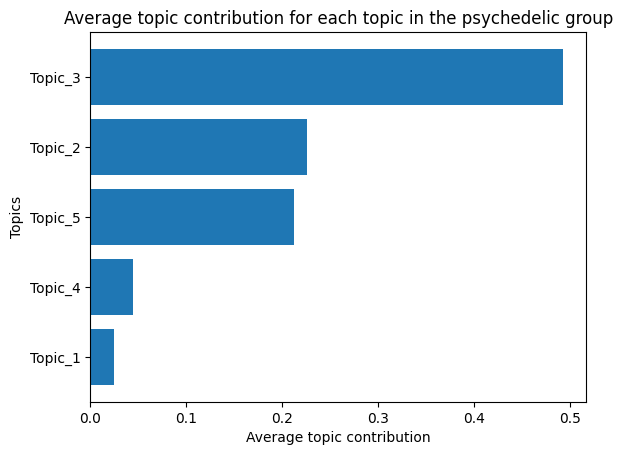

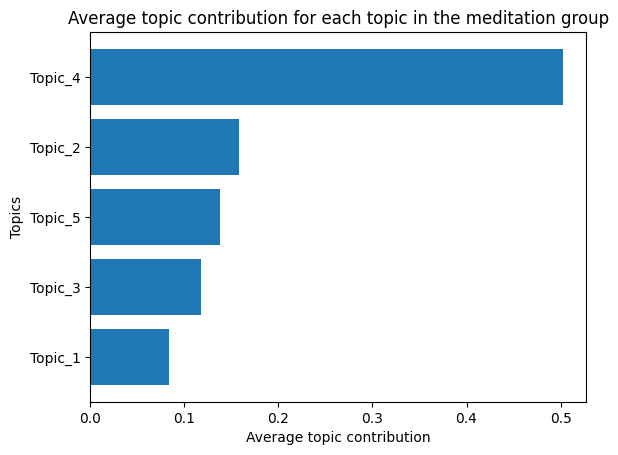

In [76]:
# Visualising the topic contributions for psyke
sorted_topics_psyke = psyke_average_topic_contributions.sort_values()
fig, ax = plt.subplots()
ax.barh(sorted_topics_psyke.index, sorted_topics_psyke.values)
ax.set_xlabel('Average topic contribution')
ax.set_ylabel('Topics')
ax.set_title('Average topic contribution for each topic in the psychedelic group')
plt.show()

# Visualising the topic contributions for medi
sorted_topics_medi = medi_average_topic_contributions.sort_values()
fig, ax = plt.subplots()
ax.barh(sorted_topics_medi.index, sorted_topics_medi.values)
ax.set_xlabel('Average topic contribution')
ax.set_ylabel('Topics')
ax.set_title('Average topic contribution for each topic in the meditation group')
plt.show()


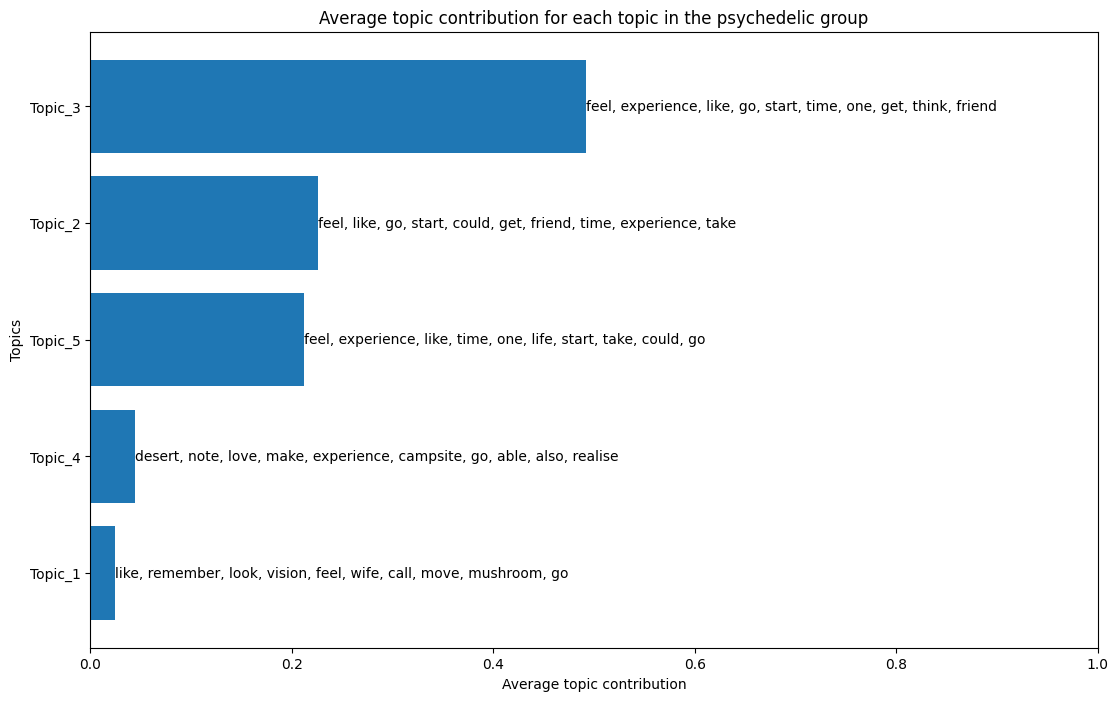

In [77]:
# Visualising the topic contributions with the top words


# Saving the top words into a dict
psyke_top_words_dict = {
    "Topic_1": "like, remember, look, vision, feel, wife, call, move, mushroom, go",
    "Topic_2": "feel, like, go, start, could, get, friend, time, experience, take",
    "Topic_3": "feel, experience, like, go, start, time, one, get, think, friend",
    "Topic_4": "desert, note, love, make, experience, campsite, go, able, also, realise",
    "Topic_5": "feel, experience, like, time, one, life, start, take, could, go"
}


# Creating the visualisation
sorted_topics_psyke = psyke_average_topic_contributions.sort_values()
fig, ax = plt.subplots(figsize=(13, 8))  # Adjust the size as needed
bars = ax.barh(sorted_topics_psyke.index, sorted_topics_psyke.values)

# Add top words next to the bars
for bar, topic in zip(bars, sorted_topics_psyke.index):
    ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, psyke_top_words_dict[topic], 
            va='center')  # Center the text vertically

ax.set_xlabel('Average topic contribution')
ax.set_ylabel('Topics')
ax.set_title('Average topic contribution for each topic in the psychedelic group')

# Set the limits of the x-axis
ax.set_xlim([0, 1])

plt.show()

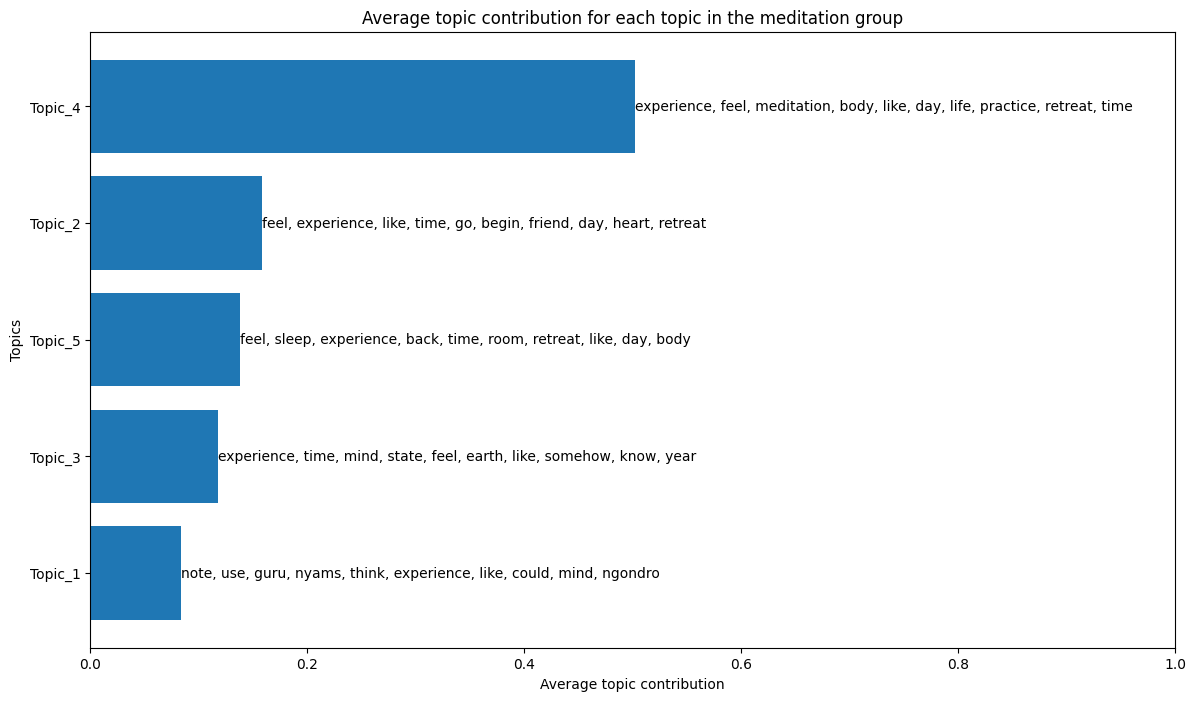

In [78]:
# Doing the same for medi topics

medi_top_words_dict = {
    "Topic_1": "note, use, guru, nyams, think, experience, like, could, mind, ngondro",
    "Topic_2": "feel, experience, like, time, go, begin, friend, day, heart, retreat",
    "Topic_3": "experience, time, mind, state, feel, earth, like, somehow, know, year",
    "Topic_4": "experience, feel, meditation, body, like, day, life, practice, retreat, time",
    "Topic_5": "feel, sleep, experience, back, time, room, retreat, like, day, body"
}


# Visualising the topic contributions for medi
sorted_topics_medi = medi_average_topic_contributions.sort_values()
fig, ax = plt.subplots(figsize=(14, 8))  # Adjust the size as needed
bars = ax.barh(sorted_topics_medi.index, sorted_topics_medi.values)

# Add top words next to the bars
for bar, topic in zip(bars, sorted_topics_medi.index):
    ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, medi_top_words_dict[topic], 
            va='center')  # Center the text vertically

ax.set_xlabel('Average topic contribution')
ax.set_ylabel('Topics')
ax.set_title('Average topic contribution for each topic in the meditation group')

# Set the limits of the x-axis
ax.set_xlim([0, 1])

plt.show()

# Sentiment analysis

In [70]:
from nltk.sentiment import SentimentIntensityAnalyzer




In [71]:
try:
    sia = SentimentIntensityAnalyzer()
except LookupError:
    nltk.download('vader_lexicon')
    sia = SentimentIntensityAnalyzer()


In [72]:
# Adding sentiment scores to both dataframes

psyke.loc[:, 'sentiment_scores'] = psyke['Open_report typo-corrected'].apply(lambda x: sia.polarity_scores(x))

psyke.loc[:, 'compound_sentiment'] = psyke['sentiment_scores'].apply(lambda x: x['compound'])
psyke.loc[:, 'positive_sentiment'] = psyke['sentiment_scores'].apply(lambda x: x['pos'])
psyke.loc[:, 'neutral_sentiment'] = psyke['sentiment_scores'].apply(lambda x: x['neu'])
psyke.loc[:, 'negative_sentiment'] = psyke['sentiment_scores'].apply(lambda x: x['neg'])

medi.loc[:, 'sentiment_scores'] = medi['Open_report typo-corrected'].apply(lambda x: sia.polarity_scores(x))

medi.loc[:, 'compound_sentiment'] = medi['sentiment_scores'].apply(lambda x: x['compound'])
medi.loc[:, 'positive_sentiment'] = medi['sentiment_scores'].apply(lambda x: x['pos'])
medi.loc[:, 'neutral_sentiment'] = medi['sentiment_scores'].apply(lambda x: x['neu'])
medi.loc[:, 'negative_sentiment'] = medi['sentiment_scores'].apply(lambda x: x['neg'])


psyke[['compound_sentiment', 'positive_sentiment', 'neutral_sentiment', 'negative_sentiment']].head(2)

/var/folders/1_/ff72pvzx3tqc2qtzyq7wlzxm0000gn/T/ipykernel_27377/2723210789.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  psyke.loc[:, 'sentiment_scores'] = psyke['Open_report typo-corrected'].apply(lambda x: sia.polarity_scores(x))
/var/folders/1_/ff72pvzx3tqc2qtzyq7wlzxm0000gn/T/ipykernel_27377/2723210789.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  psyke.loc[:, 'compound_sentiment'] = psyke['sentiment_scores'].apply(lambda x: x['compound'])
/var/folders/1_/ff72pvzx3tqc2qtzyq7wlzxm0000gn/T/ip

,compound_sentiment,positive_sentiment,neutral_sentiment,negative_sentiment
66,0.9826,0.140,0.841,0.018
67,0.5668,0.098,0.843,0.059


In [73]:
medi[['compound_sentiment', 'positive_sentiment', 'neutral_sentiment', 'negative_sentiment']].head(2)

,compound_sentiment,positive_sentiment,neutral_sentiment,negative_sentiment
0,0.3182,0.035,0.965,0.0
1,0.8689,0.282,0.718,0.0


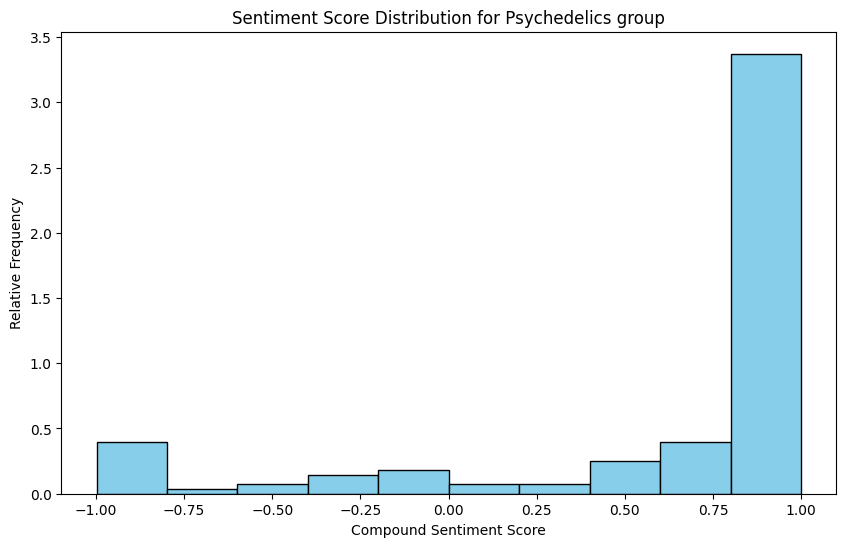

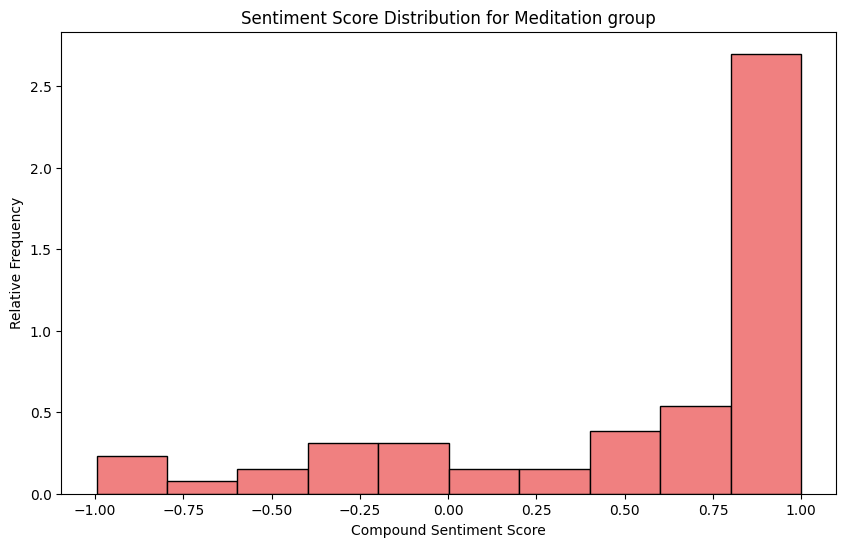

In [74]:
# Creating a sentiment histogram for Psychedelics group
plt.figure(figsize=(10,6))
plt.hist(psyke['compound_sentiment'], bins=10, color='skyblue', edgecolor='black', density=True)

# Add labels and a title
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Relative Frequency')
plt.title('Sentiment Score Distribution for Psychedelics group')

# Show the plot
plt.show()

# Creating a sentiment histogram for Meditation group
plt.figure(figsize=(10,6))
plt.hist(medi['compound_sentiment'], bins=10, color='lightcoral', edgecolor='black', density=True)

# Add labels and a title
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Relative Frequency')
plt.title('Sentiment Score Distribution for Meditation group')

# Show the plot
plt.show()

/var/folders/1_/ff72pvzx3tqc2qtzyq7wlzxm0000gn/T/ipykernel_27377/2236872054.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='Compound Sentiment Score', data=box_plot_data, palette=['skyblue', 'lightcoral'])


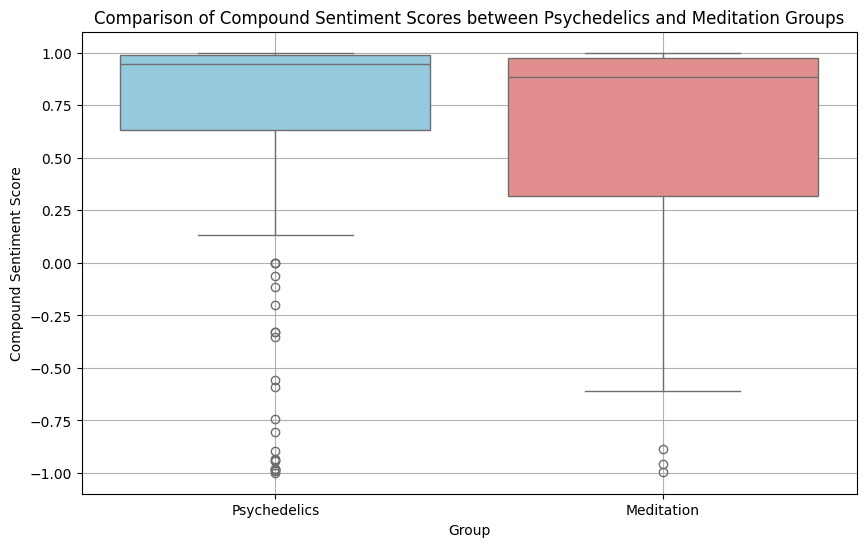

In [75]:
# Box plots

box_plot_data = pd.DataFrame({
    'Group': ['Psychedelics'] * len(psyke) + ['Meditation'] * len(medi),
    'Compound Sentiment Score': pd.concat([psyke['compound_sentiment'], medi['compound_sentiment']], ignore_index=True)
})

plt.figure(figsize=(10,6))
sns.boxplot(x='Group', y='Compound Sentiment Score', data=box_plot_data, palette=['skyblue', 'lightcoral'])
plt.title('Comparison of Compound Sentiment Scores between Psychedelics and Meditation Groups')
plt.grid(True)
plt.show()


In [76]:
from scipy.stats import normaltest

# Normality test for Psychedelics group
psyke_compound_normality = normaltest(psyke['compound_sentiment'])
psyke_positive_normality = normaltest(psyke['positive_sentiment'])
psyke_neutral_normality = normaltest(psyke['neutral_sentiment'])
psyke_negative_normality = normaltest(psyke['negative_sentiment'])

print("Psychedelics Group Normality Test Results:")
print(f"Compound Sentiment: Statistic={psyke_compound_normality.statistic}, P-value={psyke_compound_normality.pvalue}")
print(f"Positive Sentiment: Statistic={psyke_positive_normality.statistic}, P-value={psyke_positive_normality.pvalue}")
print(f"Neutral Sentiment: Statistic={psyke_neutral_normality.statistic}, P-value={psyke_neutral_normality.pvalue}")
print(f"Negative Sentiment: Statistic={psyke_negative_normality.statistic}, P-value={psyke_negative_normality.pvalue}")

# Normality test for Meditation group
medi_compound_normality = normaltest(medi['compound_sentiment'])
medi_positive_normality = normaltest(medi['positive_sentiment'])
medi_neutral_normality = normaltest(medi['neutral_sentiment'])
medi_negative_normality = normaltest(medi['negative_sentiment'])

print("\nMeditation Group Normality Test Results:")
print(f"Compound Sentiment: Statistic={medi_compound_normality.statistic}, P-value={medi_compound_normality.pvalue}")
print(f"Positive Sentiment: Statistic={medi_positive_normality.statistic}, P-value={medi_positive_normality.pvalue}")
print(f"Neutral Sentiment: Statistic={medi_neutral_normality.statistic}, P-value={medi_neutral_normality.pvalue}")
print(f"Negative Sentiment: Statistic={medi_negative_normality.statistic}, P-value={medi_negative_normality.pvalue}")


Psychedelics Group Normality Test Results:
Compound Sentiment: Statistic=48.88848749601216, P-value=2.4210280764332247e-11
Positive Sentiment: Statistic=19.05701683305911, P-value=7.27480529001786e-05
Neutral Sentiment: Statistic=10.832010074470038, P-value=0.004444868308963488
Negative Sentiment: Statistic=28.146016125599296, P-value=7.729835550323003e-07

Meditation Group Normality Test Results:
Compound Sentiment: Statistic=14.560385094484326, P-value=0.0006890528756879303
Positive Sentiment: Statistic=17.328511671169, P-value=0.00017264797975540235
Neutral Sentiment: Statistic=3.0305368964866197, P-value=0.2197491856461445
Negative Sentiment: Statistic=72.53929948377362, P-value=1.7712964675734605e-16


### Sentiment scores by the group

In [78]:
# Difference in different sentiments

psyke_avg_comp = round(psyke['compound_sentiment'].mean(), 2)
psyke_std_comp = round(psyke['compound_sentiment'].std(), 2)

psyke_median_comp = round(psyke['compound_sentiment'].median(), 2)


medi_avg_comp = round(medi['compound_sentiment'].mean(), 2)
medi_std_comp = round(medi['compound_sentiment'].std(), 2)

medi_median_comp = round(medi['compound_sentiment'].median(), 2)


print('Psychedelics average compound score: '+str(psyke_avg_comp)+ ' ('+str(psyke_std_comp) +').')
print('Meditation average compound score: '+str(medi_avg_comp)+ ' ('+str(medi_std_comp)+').')
print('Psychedelics compound median: ' +str(psyke_median_comp))
print('Meditation compound median: ' +str(medi_median_comp))


psyke_avg_pos = round(psyke['positive_sentiment'].mean(), 2)
psyke_std_pos = round(psyke['positive_sentiment'].std(), 2)

psyke_median_pos = round(psyke['positive_sentiment'].median(), 2)


medi_avg_pos = round(medi['positive_sentiment'].mean(), 2)
medi_std_pos = round(medi['positive_sentiment'].std(), 2)

medi_median_pos = round(medi['positive_sentiment'].median(), 2)


print('Psychedelics average positive score: '+str(psyke_avg_pos)+ ' ('+str(psyke_std_pos) +').')
print('Meditation average positive score: '+str(medi_avg_pos)+ ' ('+str(medi_std_pos)+').')
print('Psychedelics positive median: ' +str(psyke_median_pos))
print('Meditation positive median: ' +str(medi_median_pos))


psyke_avg_neg = round(psyke['negative_sentiment'].mean(), 2)
psyke_std_neg = round(psyke['negative_sentiment'].std(), 2)

psyke_median_neg = round(psyke['negative_sentiment'].median(), 2)


medi_avg_neg = round(medi['negative_sentiment'].mean(), 2)
medi_std_neg = round(medi['negative_sentiment'].std(), 2)

medi_median_neg = round(medi['negative_sentiment'].median(), 2)


print('Psychedelics average negative score: '+str(psyke_avg_neg)+ ' ('+str(psyke_std_neg) +').')
print('Meditation average negative score: '+str(medi_avg_neg)+ ' ('+str(medi_std_neg)+').')
print('Psychedelics negative median: ' +str(psyke_median_neg))
print('Meditation negative median: ' +str(medi_median_neg))


psyke_avg_neu = round(psyke['neutral_sentiment'].mean(), 2)
psyke_std_neu = round(psyke['neutral_sentiment'].std(), 2)

psyke_median_neu = round(psyke['neutral_sentiment'].median(), 2)


medi_avg_neu = round(medi['neutral_sentiment'].mean(), 2)
medi_std_neu = round(medi['neutral_sentiment'].std(), 2)

medi_median_neu = round(medi['neutral_sentiment'].median(), 2)


print('Psychedelics average neutral score: '+str(psyke_avg_neu)+ ' ('+str(psyke_std_neu) +').')
print('Meditation average neutral score: '+str(medi_avg_neu)+ ' ('+str(medi_std_neu)+').')
print('Psychedelics neutral median: ' +str(psyke_median_neu))
print('Meditation neutral median: ' +str(medi_median_neu))


Psychedelics average compound score: 0.64 (0.6).
Meditation average compound score: 0.55 (0.58).
Psychedelics compound median: 0.95
Meditation compound median: 0.88
Psychedelics average positive score: 0.15 (0.08).
Meditation average positive score: 0.13 (0.08).
Psychedelics positive median: 0.14
Meditation positive median: 0.12
Psychedelics average negative score: 0.07 (0.05).
Meditation average negative score: 0.06 (0.07).
Psychedelics negative median: 0.06
Meditation negative median: 0.04
Psychedelics average neutral score: 0.78 (0.09).
Meditation average neutral score: 0.81 (0.09).
Psychedelics neutral median: 0.79
Meditation neutral median: 0.82


### Mann-Whitney U-tests for pairwise comparisons
The sentiment distributions are heavily skewed, so let's use a non-parametric test for the pairwise comparisons. 

In [80]:
from scipy.stats import mannwhitneyu

# Calculate U-statistics and p-values

u_stat_comp, p_val_comp = mannwhitneyu(psyke['compound_sentiment'], medi['compound_sentiment'])
u_stat_pos, p_val_pos = mannwhitneyu(psyke['positive_sentiment'], medi['positive_sentiment'])
u_stat_neg, p_val_neg = mannwhitneyu(psyke['negative_sentiment'], medi['negative_sentiment'])
u_stat_neu, p_val_neu = mannwhitneyu(psyke['neutral_sentiment'], medi['neutral_sentiment'])

# Print U-statistics and p-values
print("Compound sentiment: U-statistic = ", u_stat_comp, ", p-value = ", p_val_comp)
print("Positive sentiment: U-statistic = ", u_stat_pos, ", p-value = ", p_val_pos)
print("Negative sentiment: U-statistic = ", u_stat_neg, ", p-value = ", p_val_neg)
print("Neutral sentiment: U-statistic = ", u_stat_neu, ", p-value = ", p_val_neu)


Compound sentiment: U-statistic =  5184.0 , p-value =  0.07365448286139599
Positive sentiment: U-statistic =  5371.0 , p-value =  0.023343665752430458
Negative sentiment: U-statistic =  5594.5 , p-value =  0.0044876074339588335
Neutral sentiment: U-statistic =  3525.5 , p-value =  0.014053394027570849


https://tools.carbocation.com/FDR was used for calculating the adjusted p-values

In [81]:
# Calculating effect sizes for the differences in sentiments

from scipy.stats import norm

# Calculate the mean and standard deviation of U
n1 = len(psyke['compound_sentiment'])
n2 = len(medi['compound_sentiment'])
mean_U = n1 * n2 / 2
std_dev_U = np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12)

# Calculate the z-scores
z_comp = (u_stat_comp - mean_U) / std_dev_U
z_pos = (u_stat_pos - mean_U) / std_dev_U
z_neg = (u_stat_neg - mean_U) / std_dev_U
z_neu = (u_stat_neu - mean_U) / std_dev_U

# Calculate the effect sizes
r_comp = round(z_comp / np.sqrt(n1 + n2), 3)
r_pos = round(z_pos / np.sqrt(n1 + n2), 3)
r_neg = round(z_neg / np.sqrt(n1 + n2), 3)
r_neu = round(z_neu / np.sqrt(n1 + n2), 3)

# Print the effect sizes
print("Compound sentiment: r =", r_comp)
print("Positive sentiment: r =", r_pos)
print("Negative sentiment: r =", r_neg)
print("Neutral sentiment: r =", r_neu)

Compound sentiment: r = 0.126
Positive sentiment: r = 0.159
Negative sentiment: r = 0.199
Neutral sentiment: r = -0.172
